<h1><center style='color:#f95738'>Table of Contents</h1><a class ='anchor' id='a'></a>


* [Packages Used](#b)
* [Data](#c)
* [EDA](#d)
* [Data Visualization](#e)
    * [Total Confirmed](#f)
    * [Total Recovered](#g)
    * [Total Deceased](#h)
    * [Total Tested](#i)

        * **[State-Wise Trends](#j)**
        * [Andaman and Nicobar Islands](#1) 
        * [Andhra Pradesh](#2)
        * [Arunachal Pradesh](#3)
        * [Assam](#4)
        * [Bihar](#5)
        * [Chandigarh](#6)
        * [Chhattisgarh](#7)
        * [Dadra and Nagar Haveli and Daman and Diu](#8)
        * [Delhi](#9)
        * [Goa](#10)
        * [Gujarat](#11)
        * [Haryana](#12)
        * [Himachal Pradesh](#13)
        * [Jammu and Kashmir](#14)
        * [Jharkhand](#15)
        * [Karnataka](#16)
        * [Kerala](#17)
        * [Ladakh](#18)
        * [Lakshadweep](#19)
        * [Madhya Pradesh](#20)
        * [Maharashtra](#21)
        * [Manipur](#22)
        * [Meghalaya](#23)
        * [Mizoram](#24)
        * [Nagaland](#25)
        * [Odisha](#26)
        * [Puducherry](#27)
        * [Punjab](#28)
        * [Rajasthan](#29)
        * [Sikkim](#30)
        * [Tamil Nadu](#31)
        * [Telangana](#32)
        * [Tripura](#33)
        * [Uttar Pradesh](#34)
        * [Uttarakhand](#35)
        * [West Bengal](#36)
* [Stats](#e)

<h2><center style='color:#f95738'>Loading Packages</h2><a class='anchor' id='b'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import datetime
today = datetime.now()
import os
if not os.path.exists('DIST_'+ today.strftime('%d-%m-%Y')):
    os.mkdir('E:/Data Science Datasets/Covid_19_Master/Local/' +'DIST_'+ today.strftime('%d-%m-%Y'))

%matplotlib inline

<h2><center style='color:#f95738'>Loading Data</h2><a class='anchor' id='c'></a>

In [2]:
district = pd.read_csv('https://api.covid19india.org/csv/latest/districts.csv')

<h2><center style='color:#f95738'>Exploratory Data Analysis</h2><a class='anchor' id='d'></a>

In [3]:
district.head()

Date                        State       District  Confirmed  \
0  2020-04-26  Andaman and Nicobar Islands        Unknown         33   
1  2020-04-26               Andhra Pradesh      Anantapur         53   
2  2020-04-26               Andhra Pradesh       Chittoor         73   
3  2020-04-26               Andhra Pradesh  East Godavari         39   
4  2020-04-26               Andhra Pradesh         Guntur        214   

   Recovered  Deceased  Other  Tested  
0         11         0      0  2679.0  
1         14         4      0     NaN  
2         13         0      0     NaN  
3         12         0      0     NaN  
4         29         8      0     NaN

In [4]:
district.tail()

Date        State           District  Confirmed  Recovered  \
249398  2021-05-19  West Bengal    Purba Bardhaman      29859      25776   
249399  2021-05-19  West Bengal    Purba Medinipur      40447      34837   
249400  2021-05-19  West Bengal            Purulia      17402      15940   
249401  2021-05-19  West Bengal  South 24 Parganas      71998      62778   
249402  2021-05-19  West Bengal     Uttar Dinajpur      14777      12862   

        Deceased  Other  Tested  
249398       119      0     NaN  
249399       311      0     NaN  
249400        83      0     NaN  
249401       968      0     NaN  
249402       153      0     NaN

In [5]:
district.describe(include = 'all').transpose()

count unique            top   freq           mean  \
Date         249403    389     2020-07-17    658            NaN   
State        249403     36  Uttar Pradesh  29013            NaN   
District     249403    639    Other State   3031            NaN   
Confirmed  249403.0    NaN            NaN    NaN   11850.553698   
Recovered  249403.0    NaN            NaN    NaN   10658.366792   
Deceased   249403.0    NaN            NaN    NaN     165.746607   
Other      249403.0    NaN            NaN    NaN        4.00332   
Tested     183364.0    NaN            NaN    NaN  170778.061092   

                     std   min      25%      50%       75%         max  
Date                 NaN   NaN      NaN      NaN       NaN         NaN  
State                NaN   NaN      NaN      NaN       NaN         NaN  
District             NaN   NaN      NaN      NaN       NaN         NaN  
Confirmed   40925.913734  -5.0    343.0   2792.0    8327.0   1402873.0  
Recovered   36928.014288 -67.0    246.0   2433.0    7588.0   1329899.0  
Deceased      686.444803 -11.0      2.0     25.0     101.0     22111.0  
Other          49.509988  -3.0      0.0      0.0       0.0      2008.0  
Tested     624606.237615   1.0  11157.0  47936.0  161704.0  18407486.0

In [6]:
#Dealing with `nan` and changing data-type
district['Tested'].fillna(0.0, inplace = True)
district['Tested'] = district['Tested'].astype('int64')

In [7]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249403 entries, 0 to 249402
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       249403 non-null  object
 1   State      249403 non-null  object
 2   District   249403 non-null  object
 3   Confirmed  249403 non-null  int64 
 4   Recovered  249403 non-null  int64 
 5   Deceased   249403 non-null  int64 
 6   Other      249403 non-null  int64 
 7   Tested     249403 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 15.2+ MB


##### Replacing names for districts which are present in 2 different states

* `Pratapgarh` (rajasthan) ----> `Pratapgarh_rj`
* `Aurangabad` (bihar)  --------> `Aurangabad_br`
* `Balrampur` (chhattisgarh) --------> `Balrampur_cg`
* `Bilaspur` (himanchal pradesh) --------> `Bilaspur_hp`

In [8]:
district[(district['State'] == 'Rajasthan') & (district['District'] == 'Pratapgarh')]= district[(district['State'] == 'Rajasthan') & (district['District'] == 'Pratapgarh')].replace('Pratapgarh', 'Pratapgarh_rj')
district[(district['State'] == 'Bihar') & (district['District'] == 'Aurangabad')]= district[(district['State'] == 'Bihar') & (district['District'] == 'Aurangabad')].replace('Aurangabad', 'Aurangabad_br')
district[(district['State'] == 'Chhattisgarh') & (district['District'] == 'Balrampur')]= district[(district['State'] == 'Chhattisgarh') & (district['District'] == 'Balrampur')].replace('Balrampur', 'Balrampur_cg')
district[(district['State'] == 'Himachal Pradesh') & (district['District'] == 'Bilaspur')]= district[(district['State'] == 'Himachal Pradesh') & (district['District'] == 'Bilaspur')].replace('Bilaspur', 'Bilaspur_hp')

#### Classifying Unknown Districts of Each State

In [9]:
district[(district['State'] == 'Manipur') & (district['District'] == 'Unknown')]= district[(district['State'] == 'Manipur') & (district['District'] == 'Unknown')].replace('Unknown', 'Unknown_MN')
district[(district['State'] == 'Goa') & (district['District'] == 'Unknown')]= district[(district['State'] == 'Goa') & (district['District'] == 'Unknown')].replace('Unknown', 'Unknown_GA')
district[(district['State'] == 'Assam') & (district['District'] == 'Unknown')]= district[(district['State'] == 'Assam') & (district['District'] == 'Unknown')].replace('Unknown', 'Unknown_AS')
district[(district['State'] == 'Andaman and Nicobar Islands') & (district['District'] == 'Unknown')]= district[(district['State'] == 'Andaman and Nicobar Islands') & (district['District'] == 'Unknown')].replace('Unknown', 'Unknown_AN')
district[(district['State'] == 'Telangana') & (district['District'] == 'Unknown')]= district[(district['State'] == 'Telangana') & (district['District'] == 'Unknown')].replace('Unknown', 'Unknown_TS')
district[(district['State'] == 'Sikkim') & (district['District'] == 'Unknown')]= district[(district['State'] ==  'Sikkim') & (district['District'] == 'Unknown')].replace('Unknown', 'Unknown_SK')

#### Dropping Invalid Districts from DataFrame

In [10]:
dst = ['Italians', 'Foreign Evacuees','Other State' ,'Others','Unknown']
for i in dst:
    italian_index = district[district['District'] == i].index
    district.drop(index = italian_index, inplace = True)

<h5 style='color:#312244'>Districts seperated for each state and saved to each state alias.</h5> 

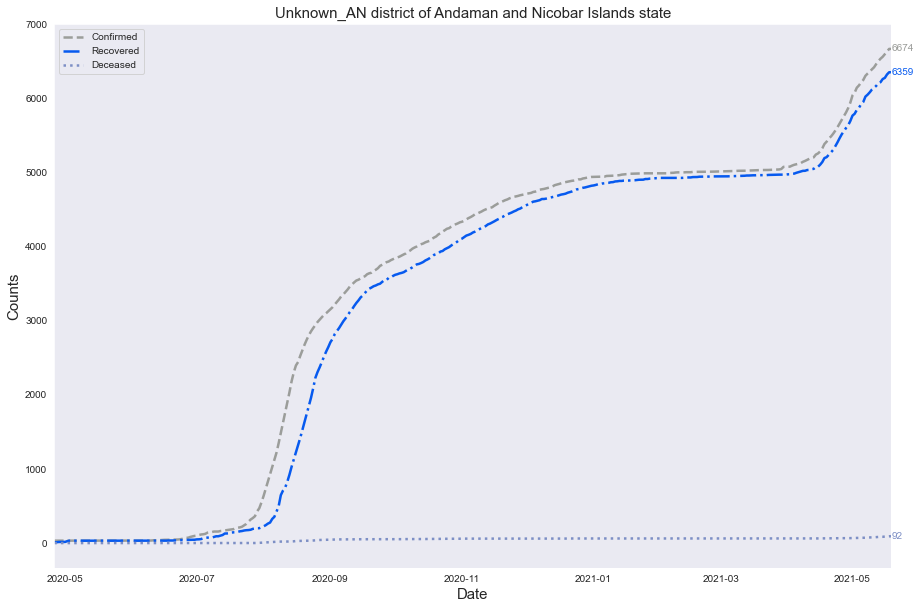

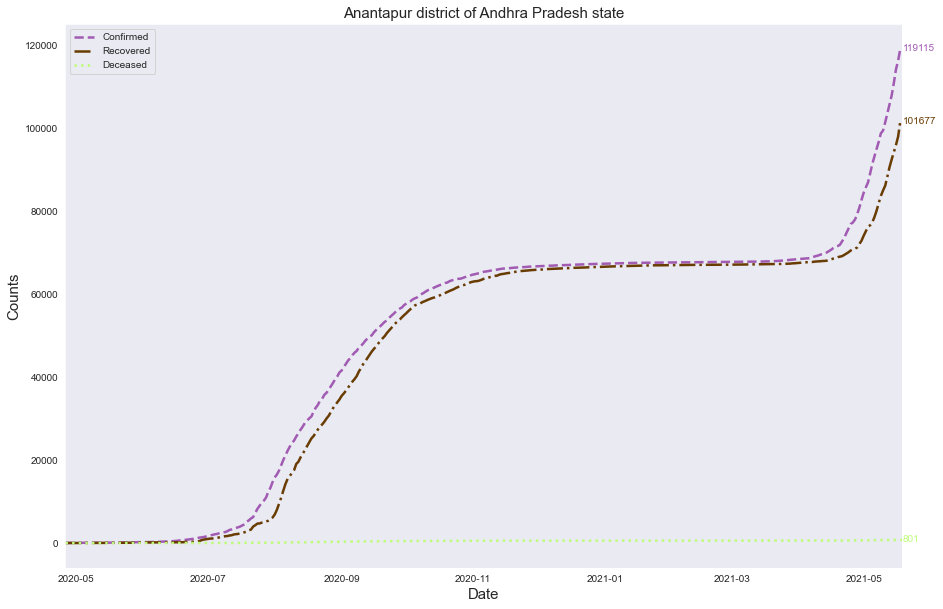

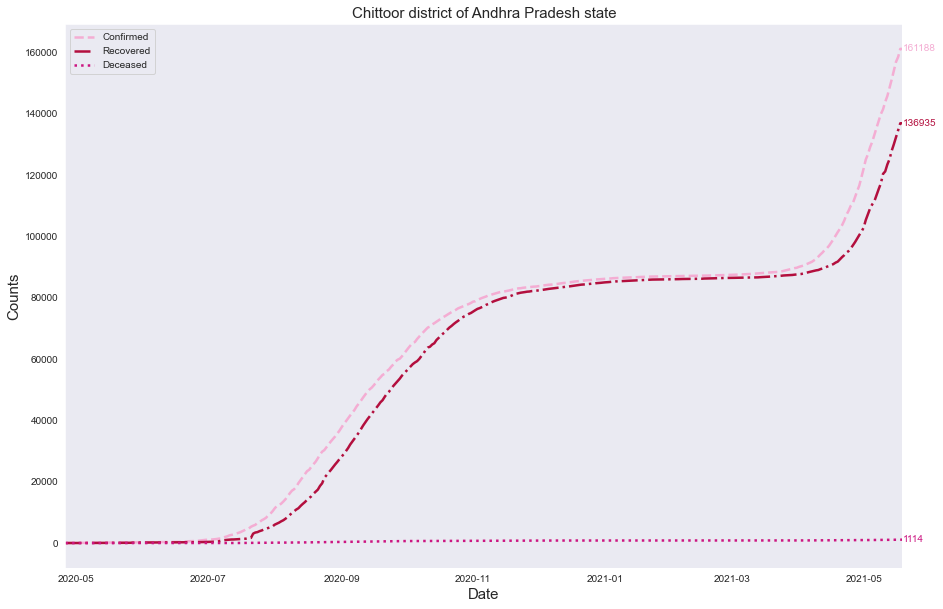

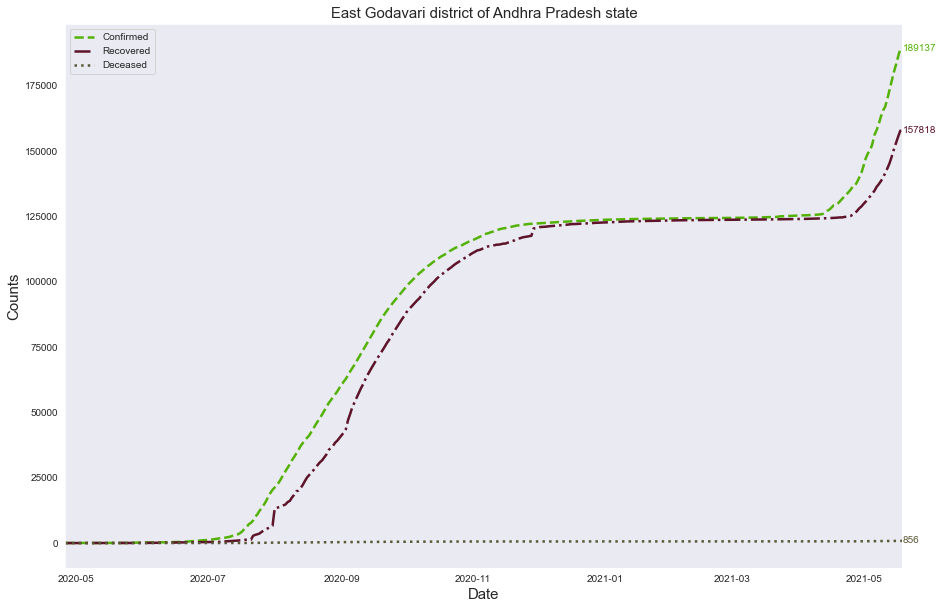

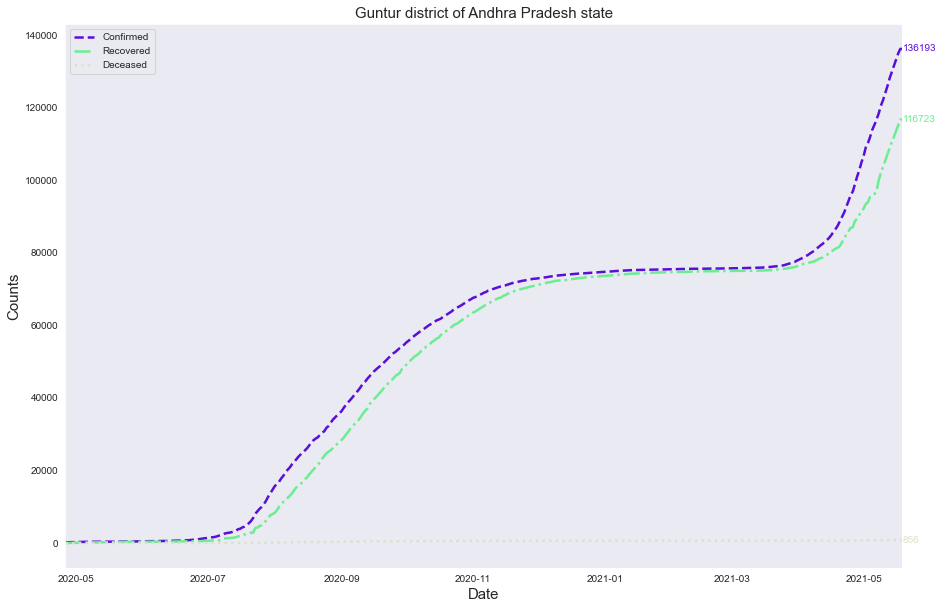

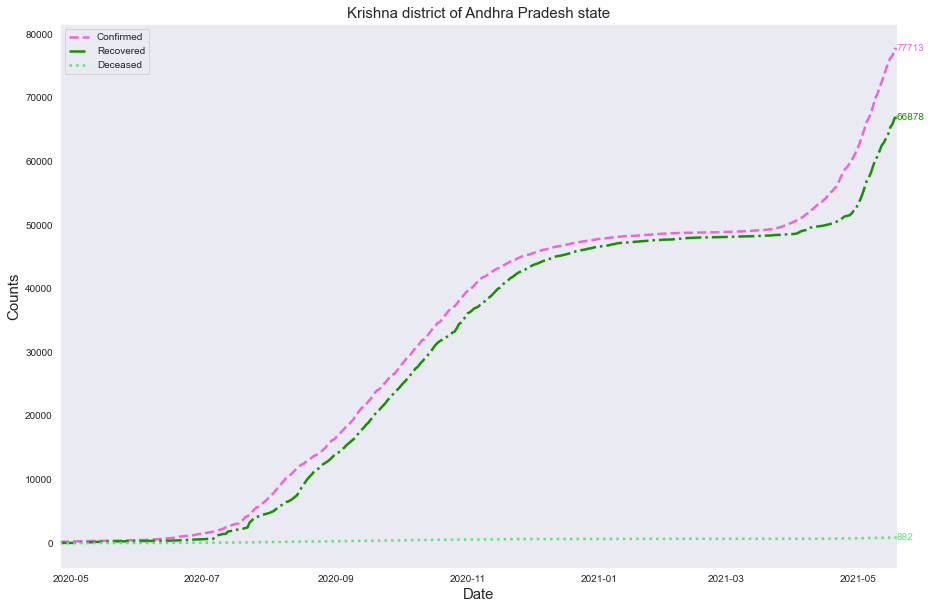

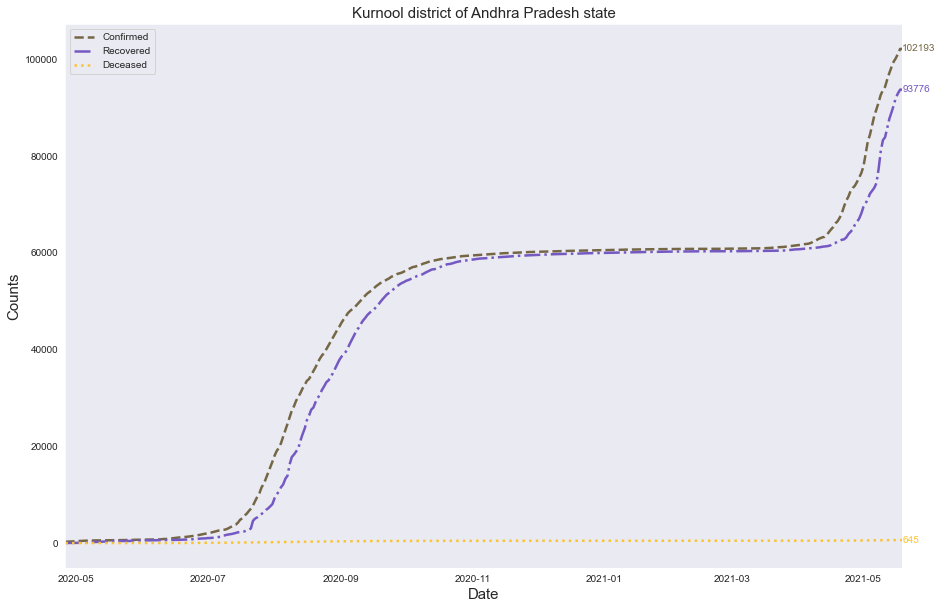

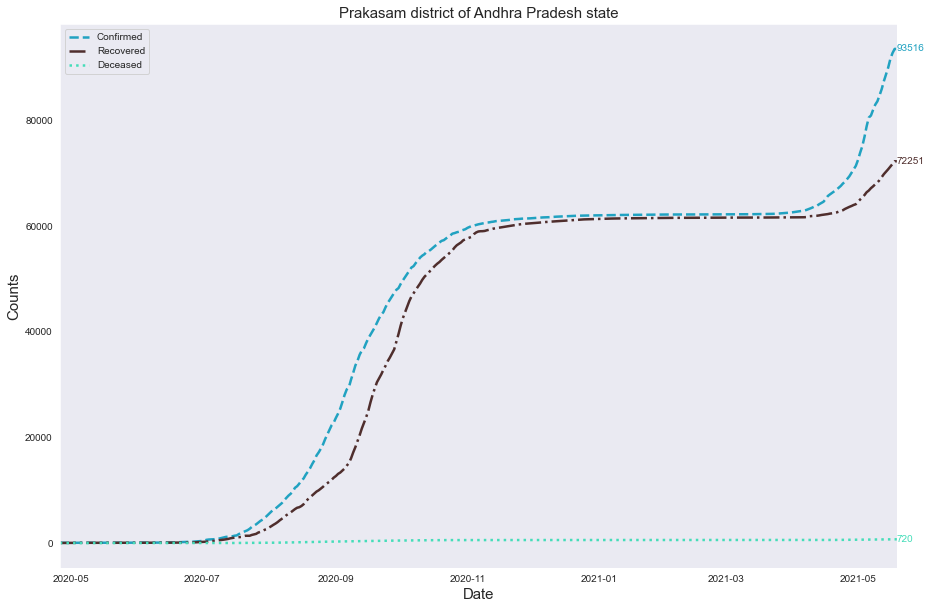

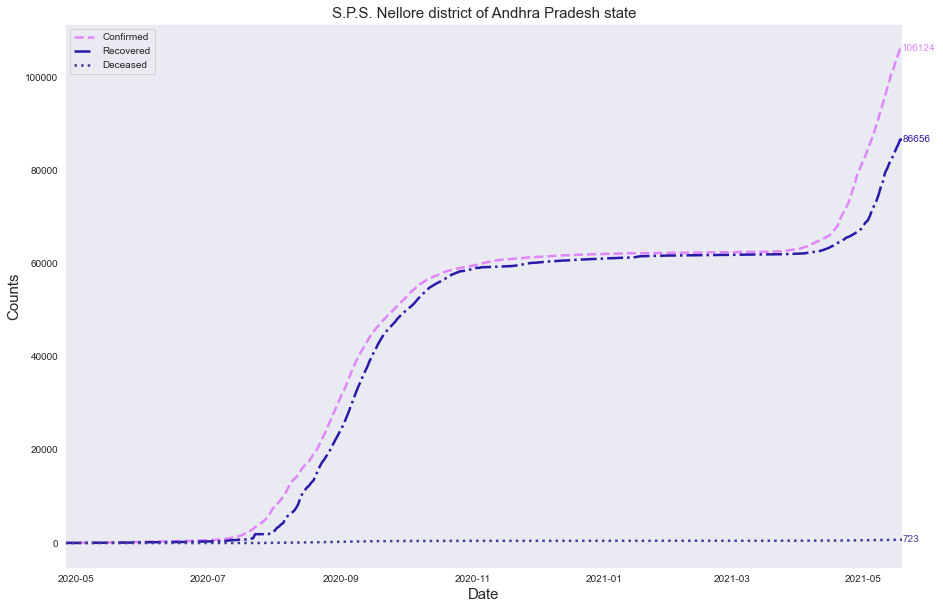

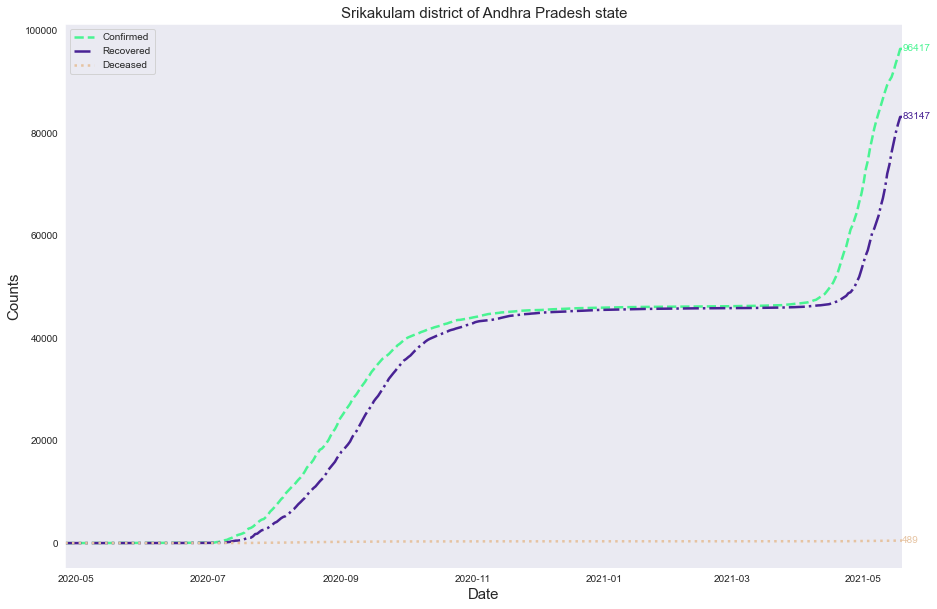

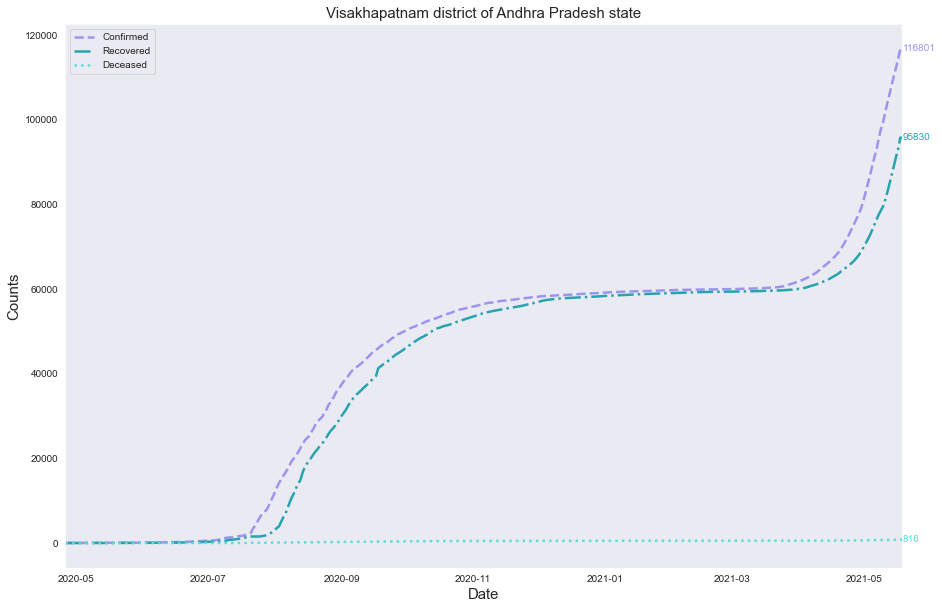

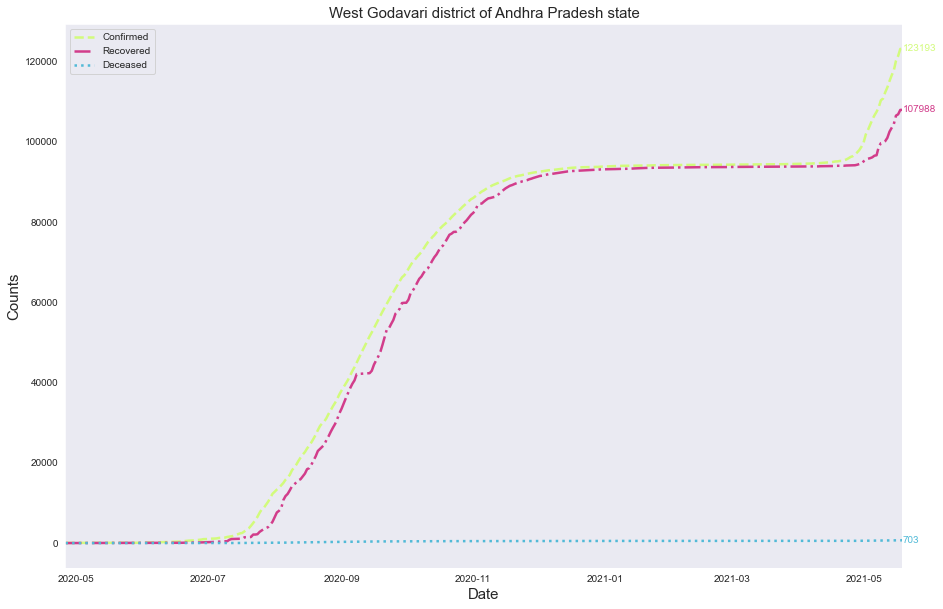

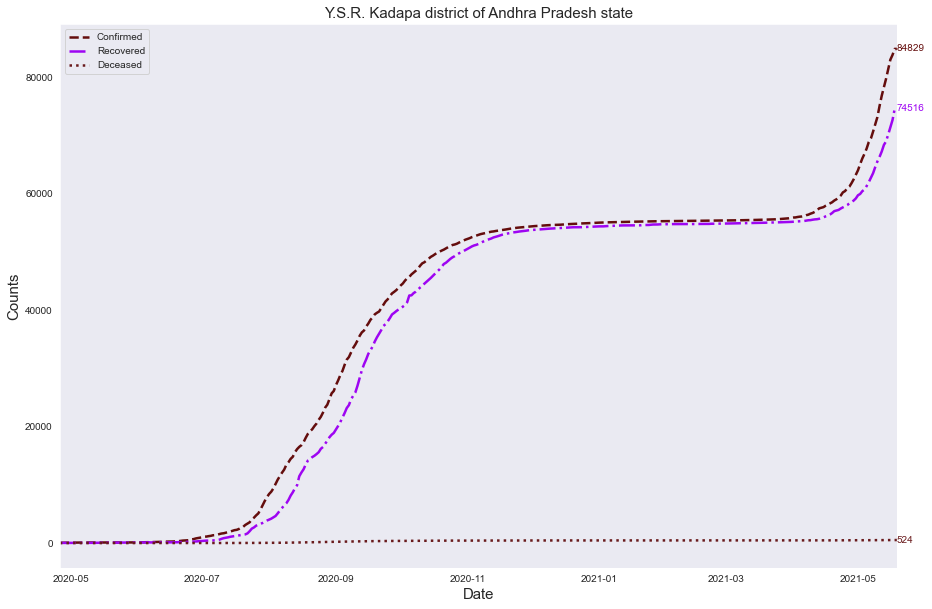

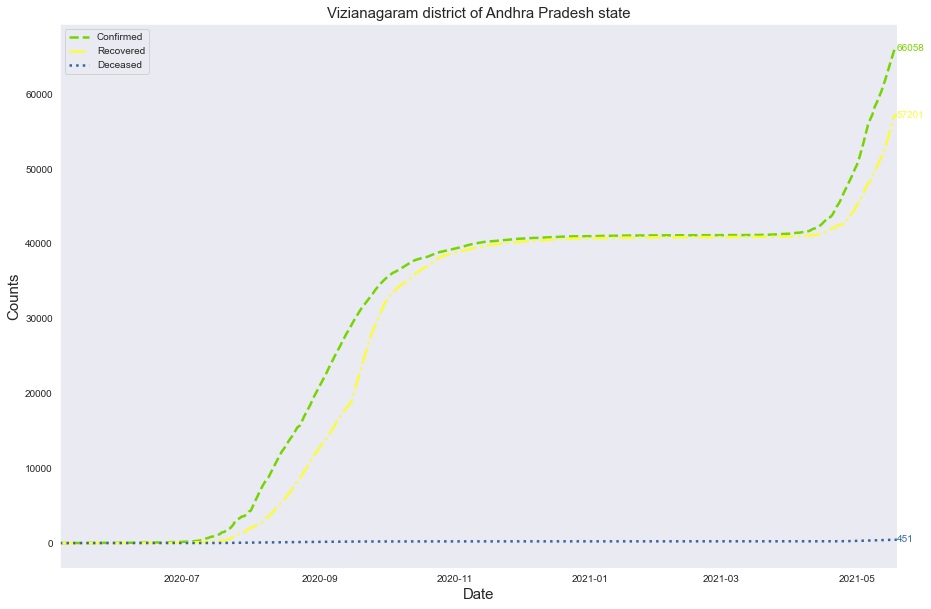

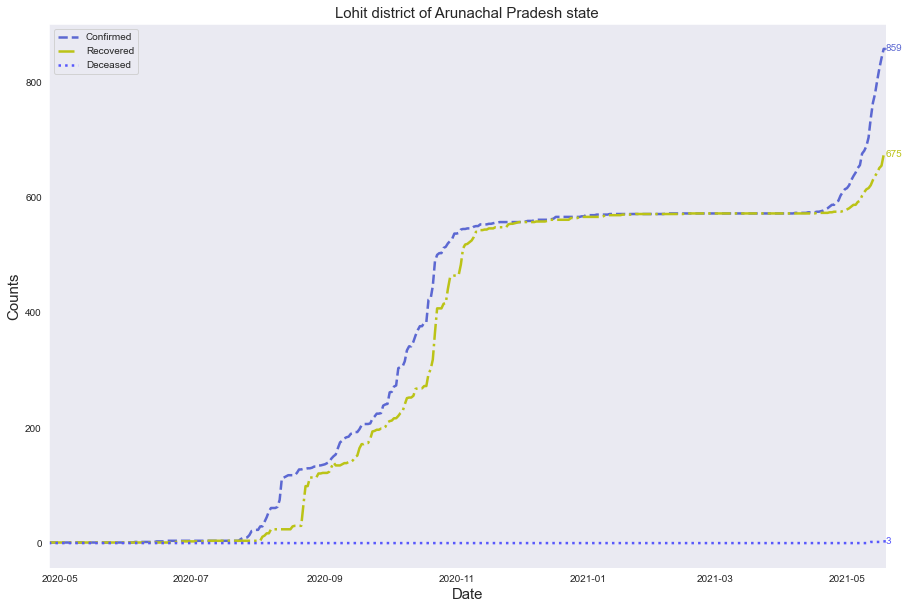

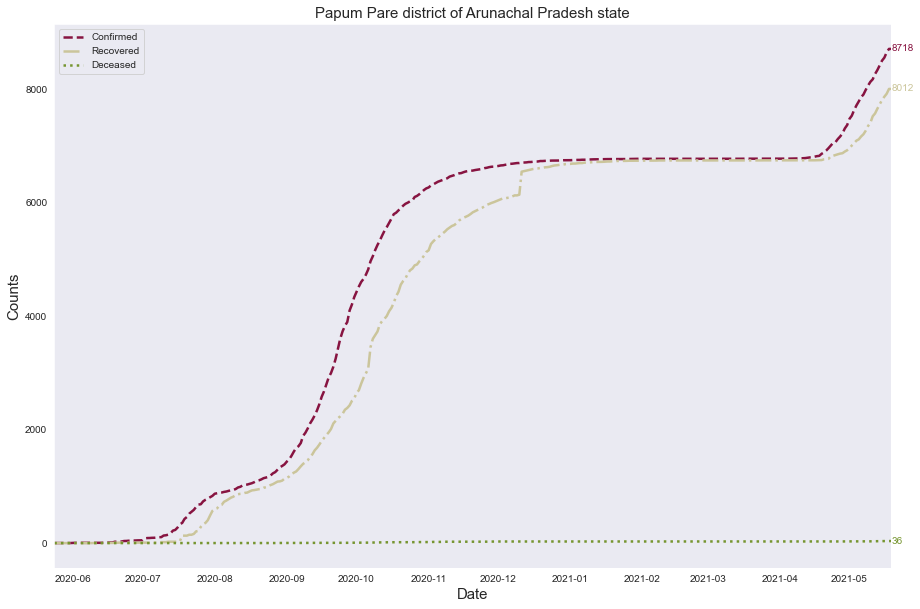

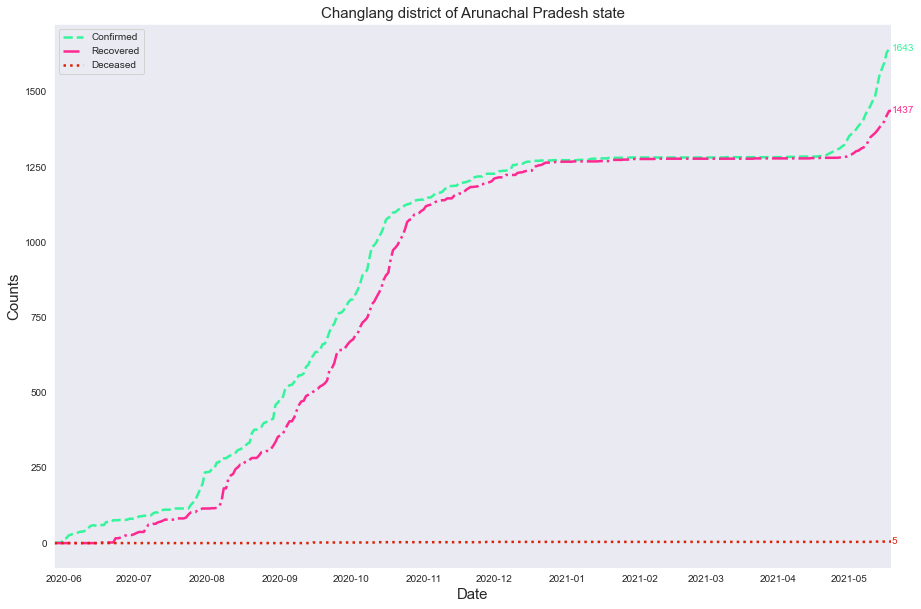

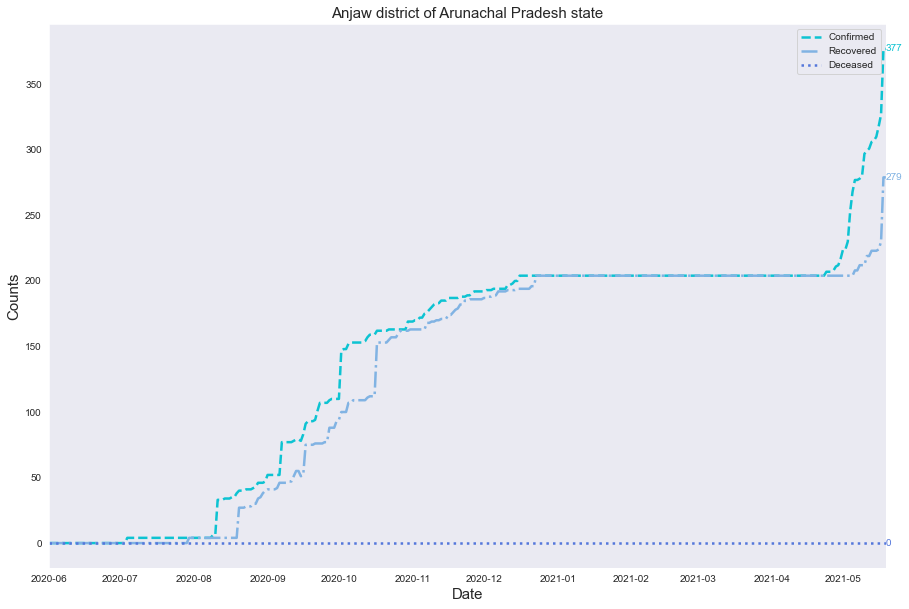

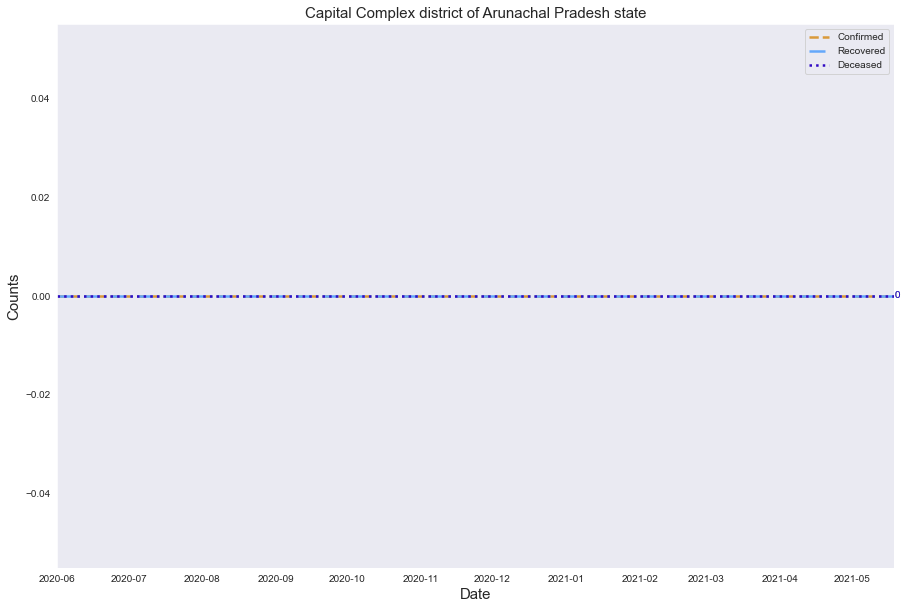

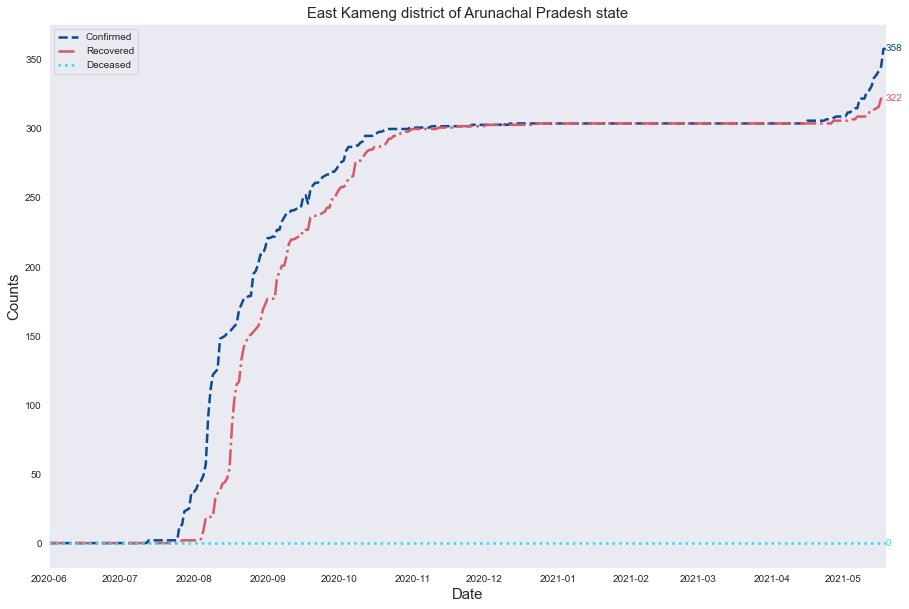

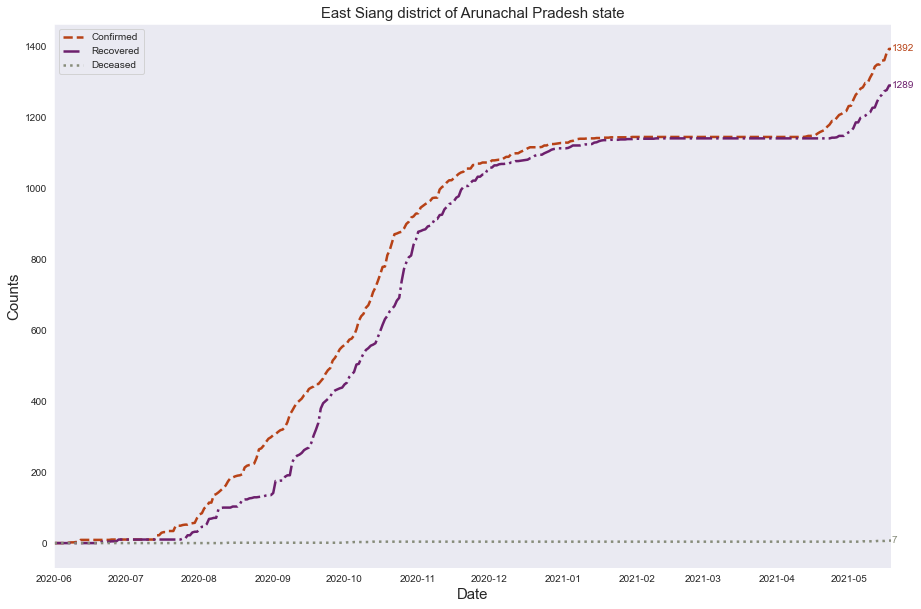

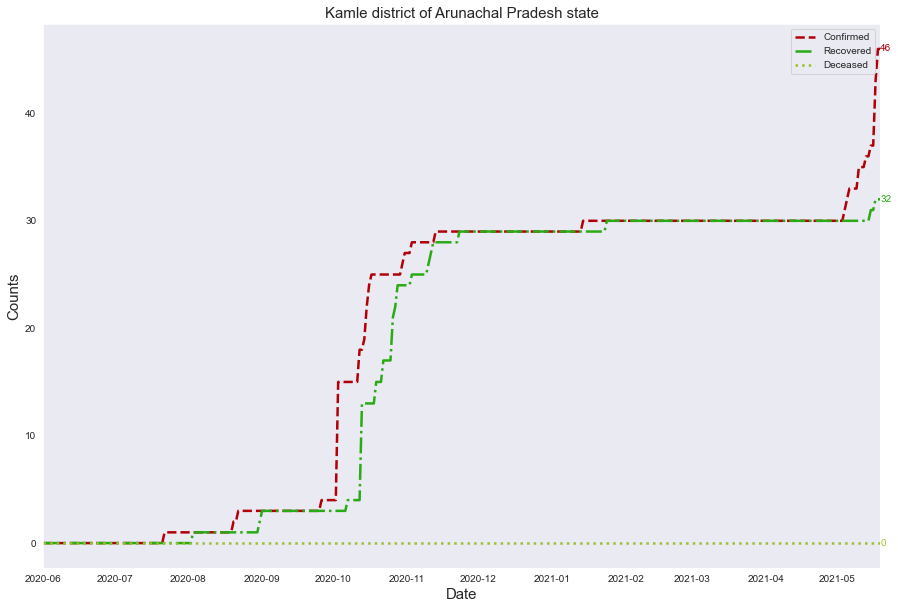

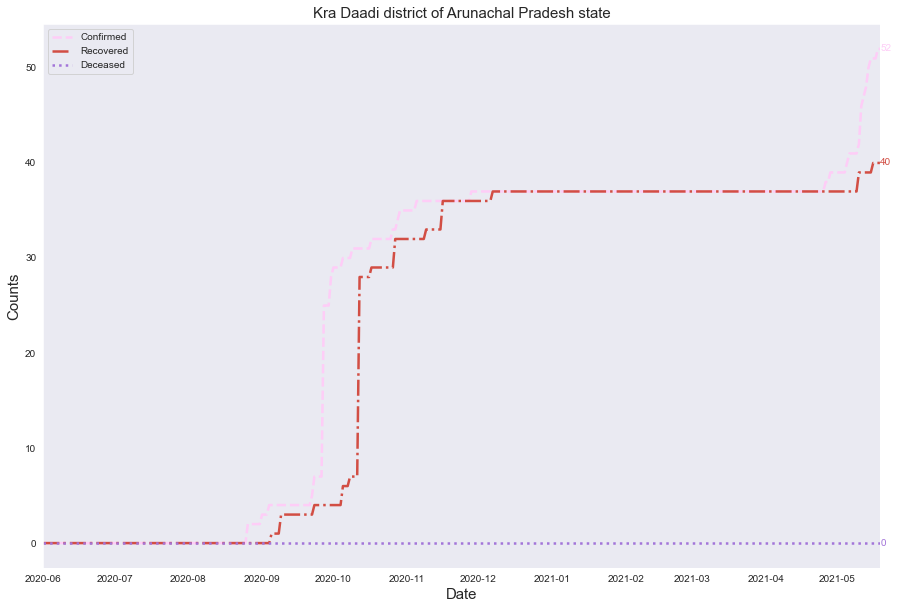

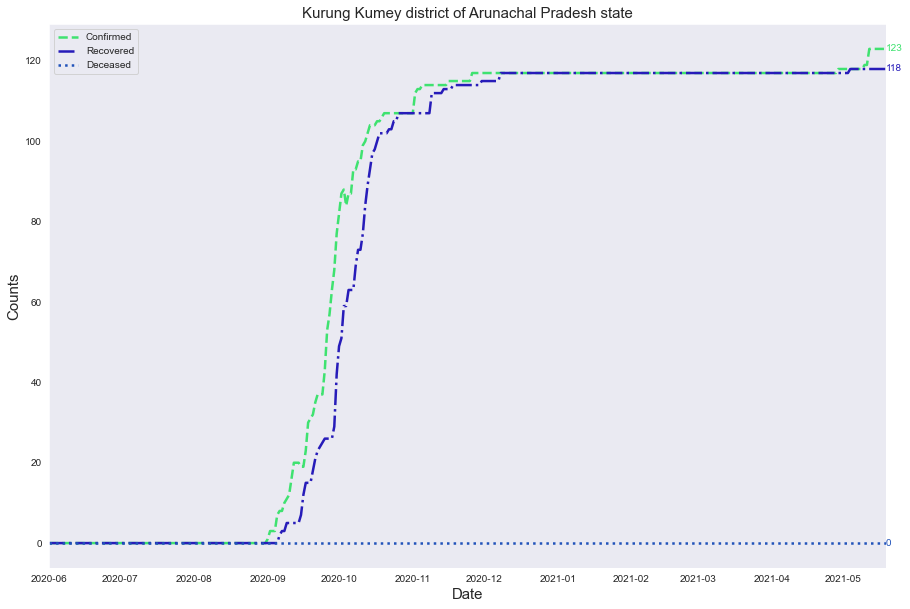

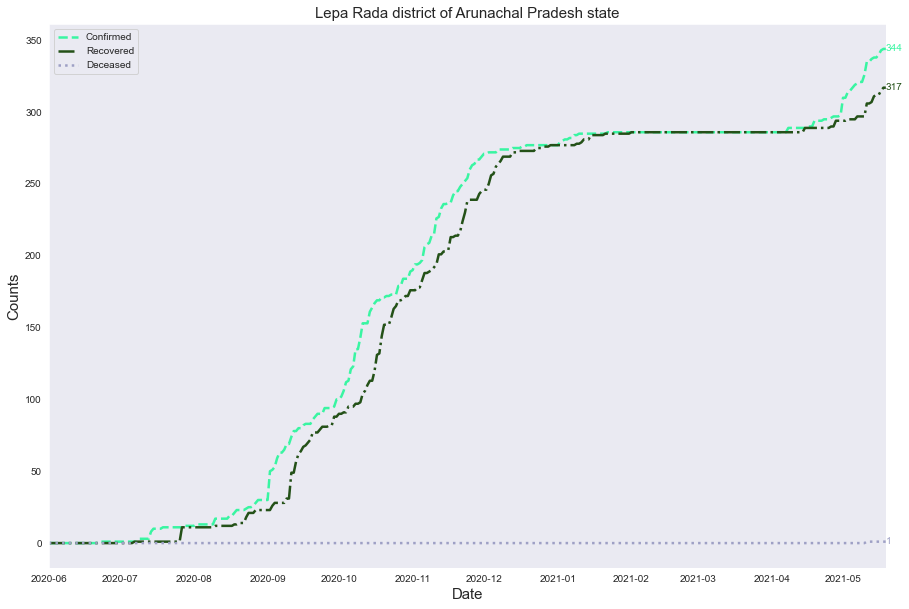

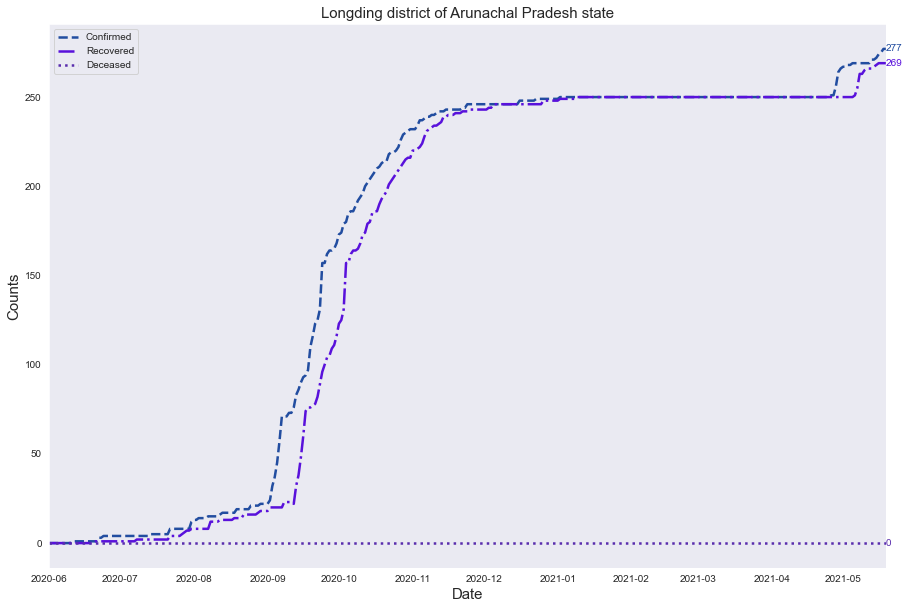

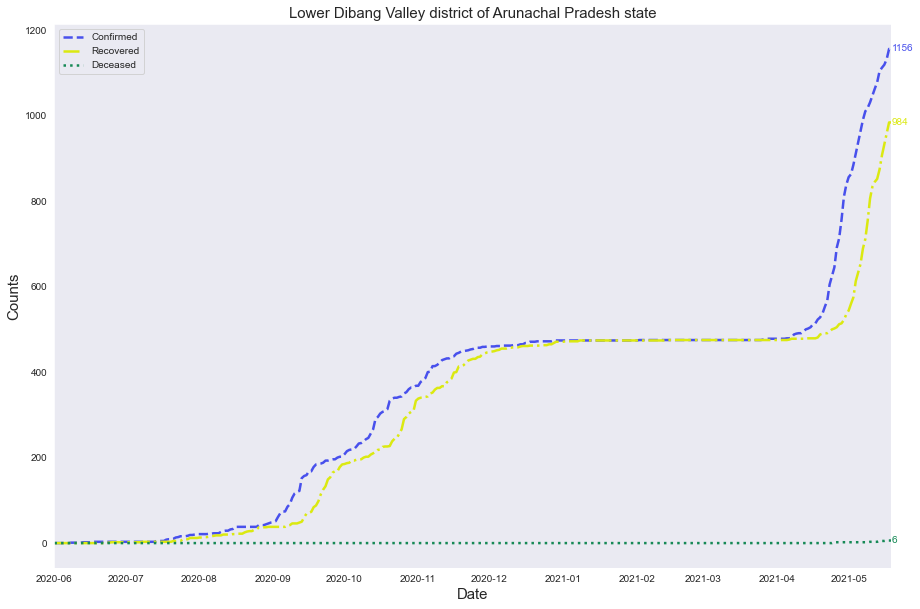

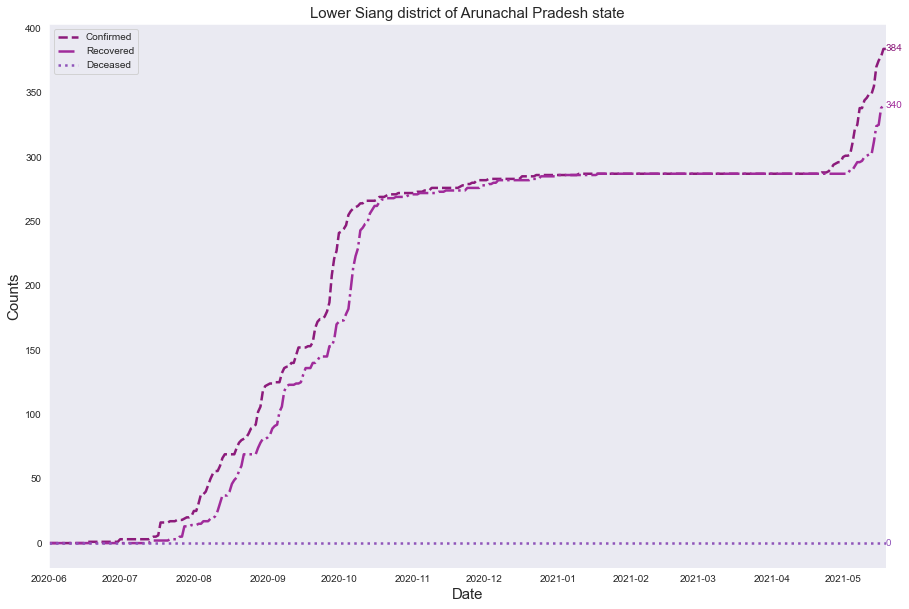

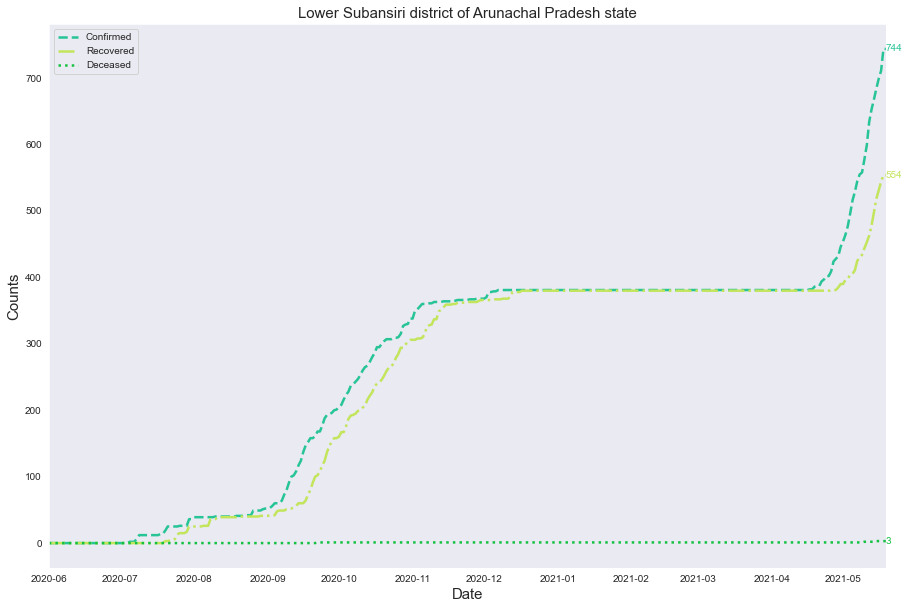

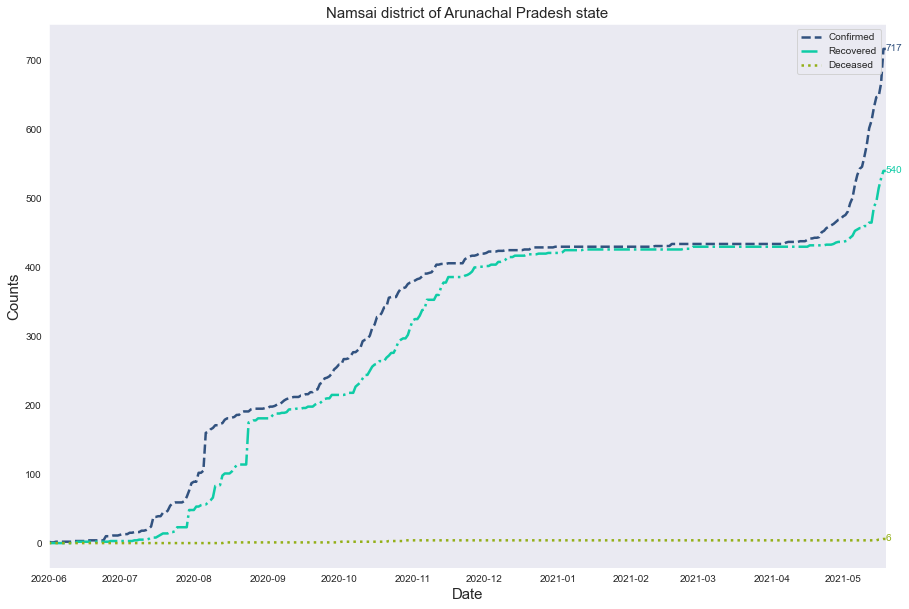

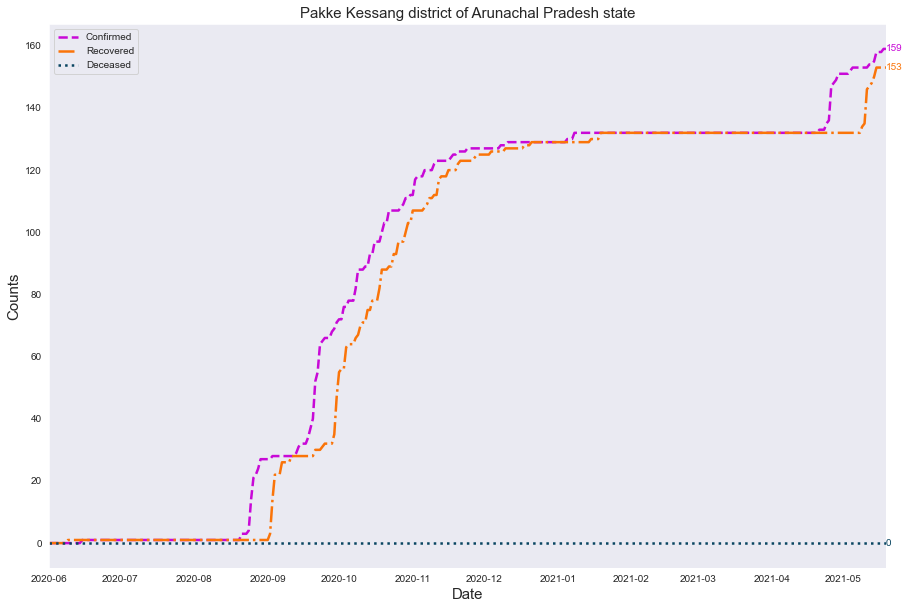

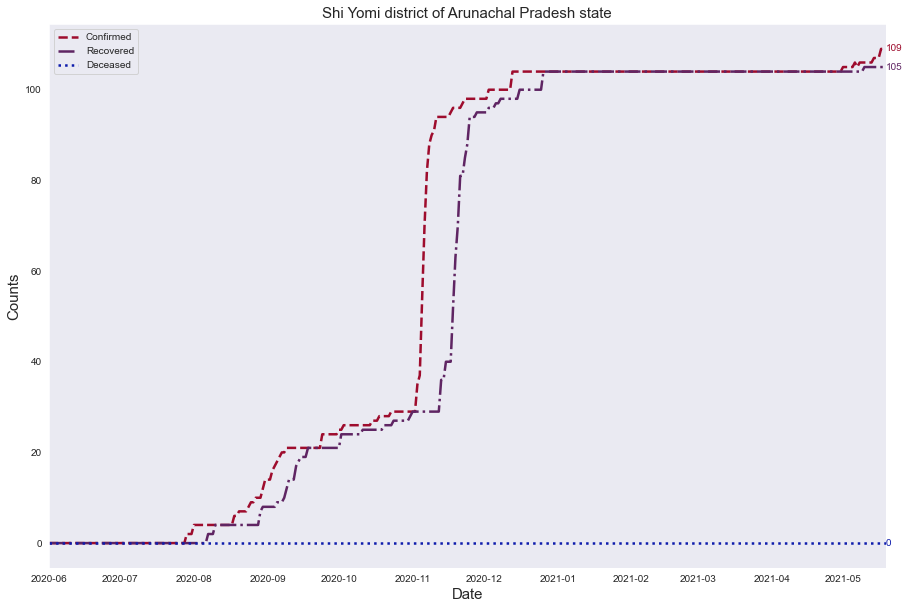

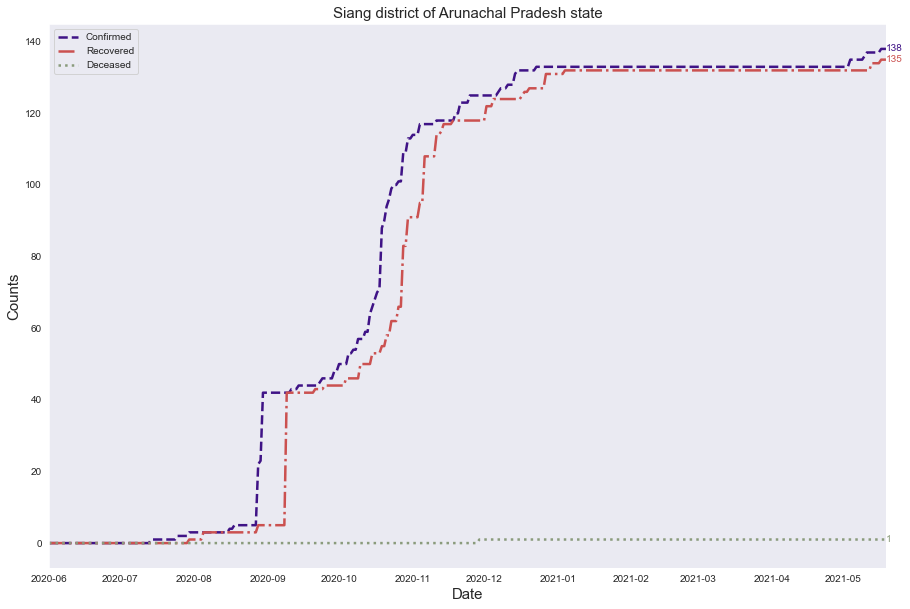

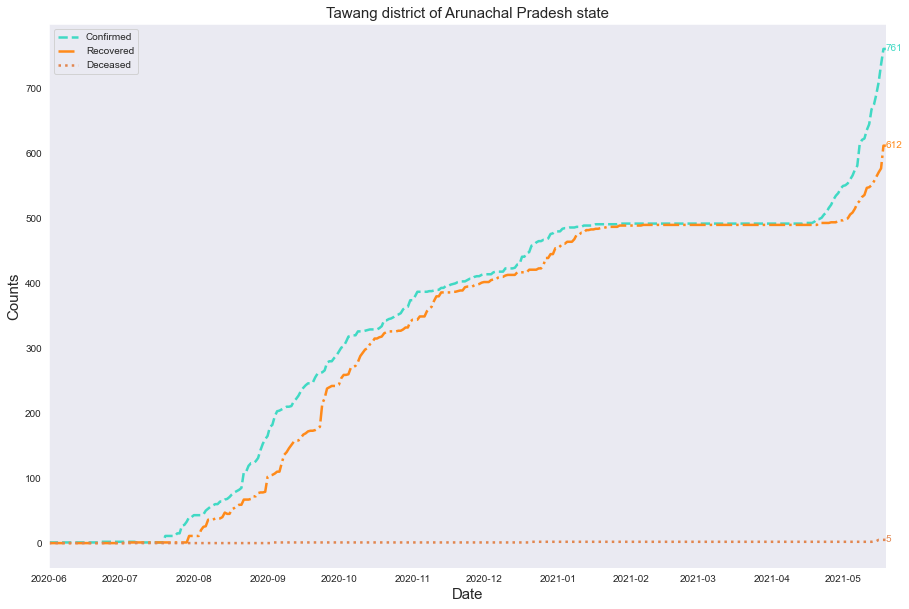

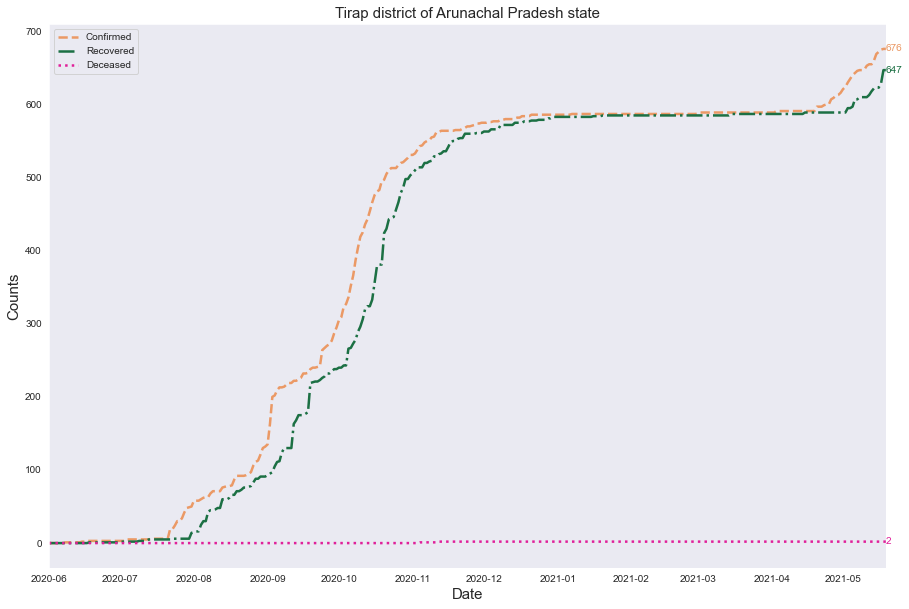

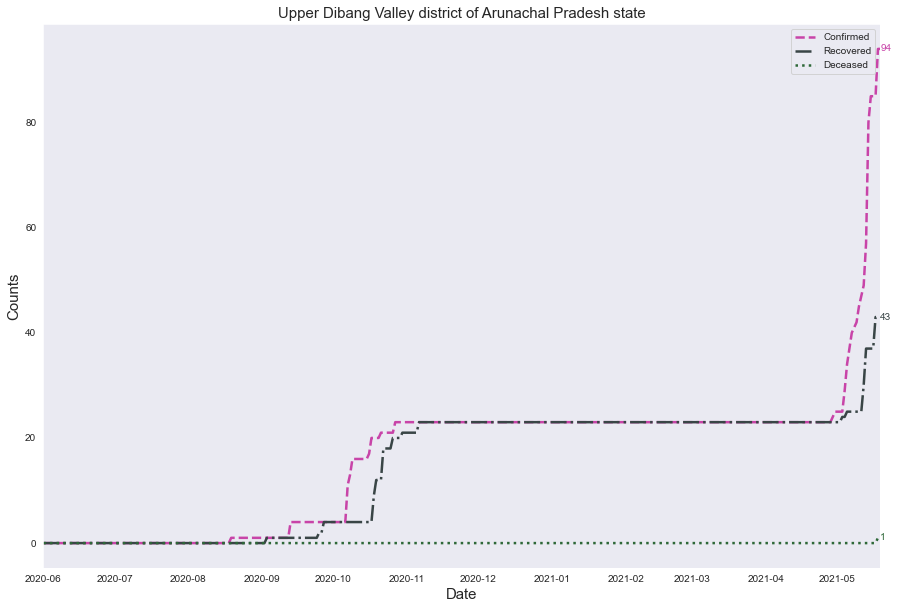

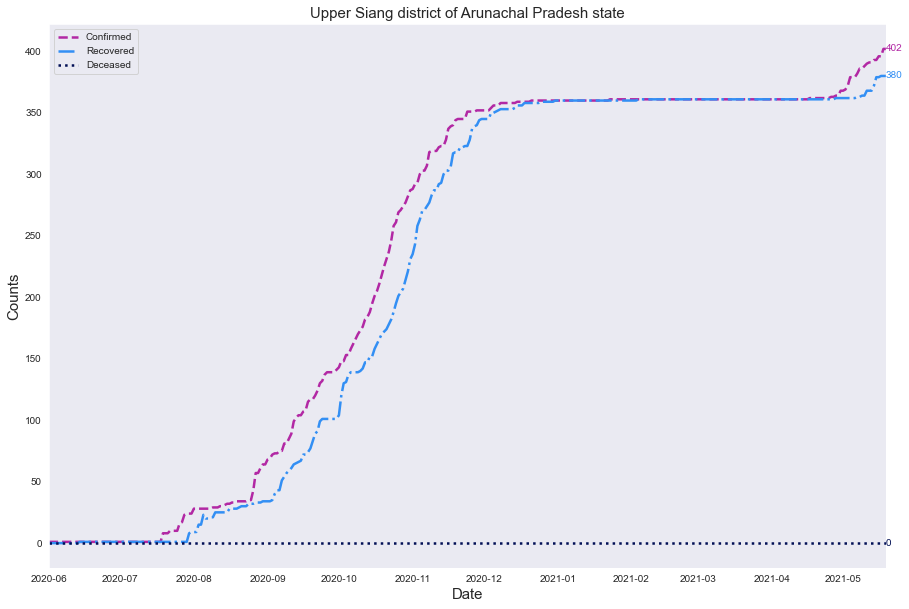

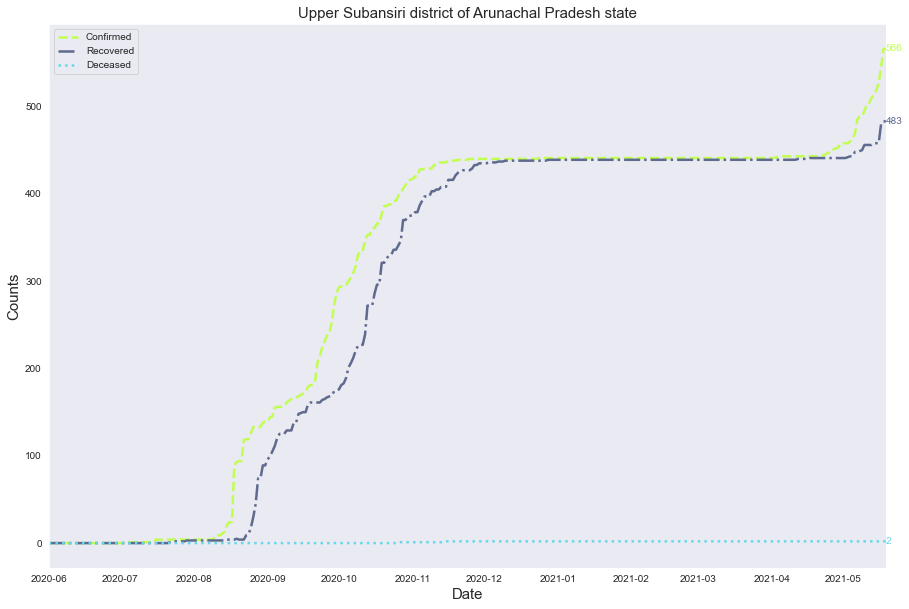

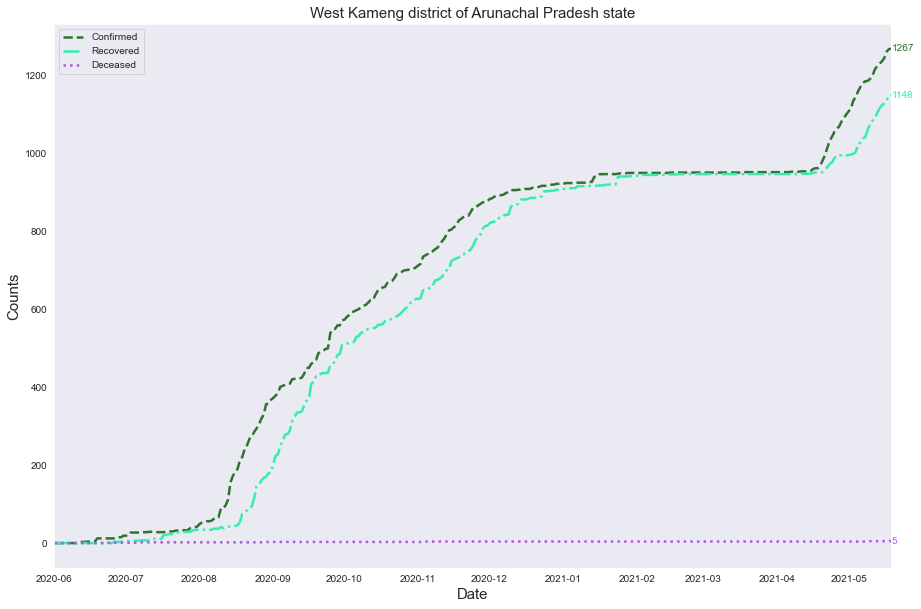

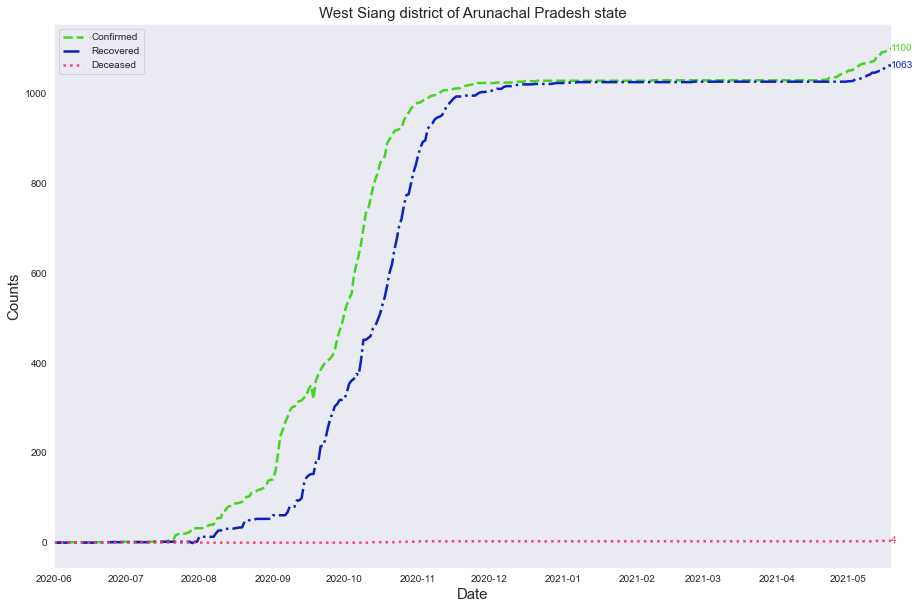

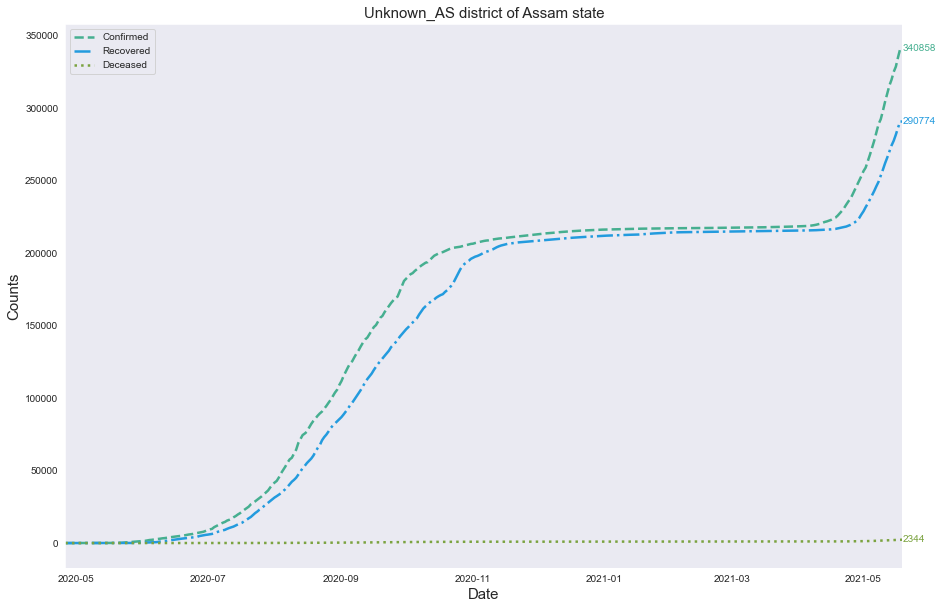

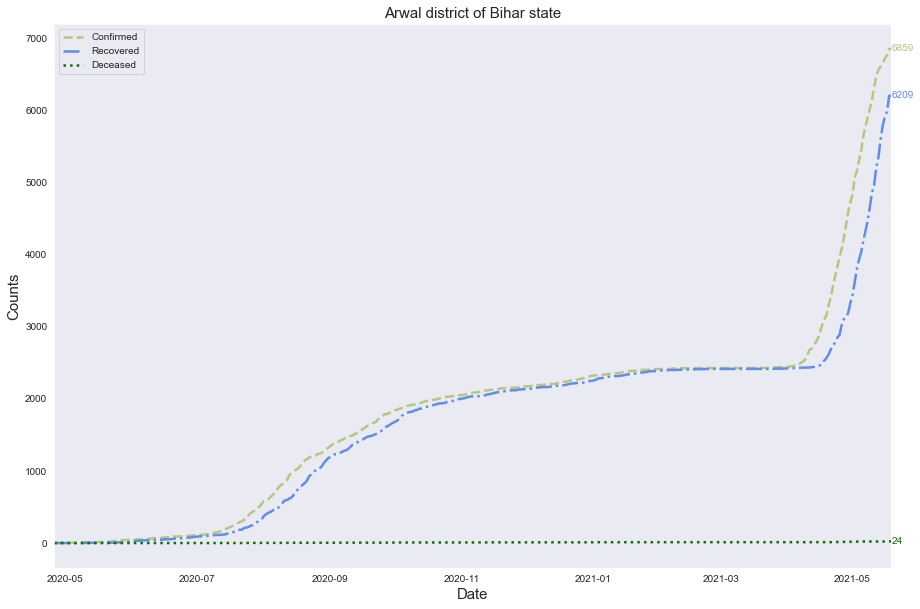

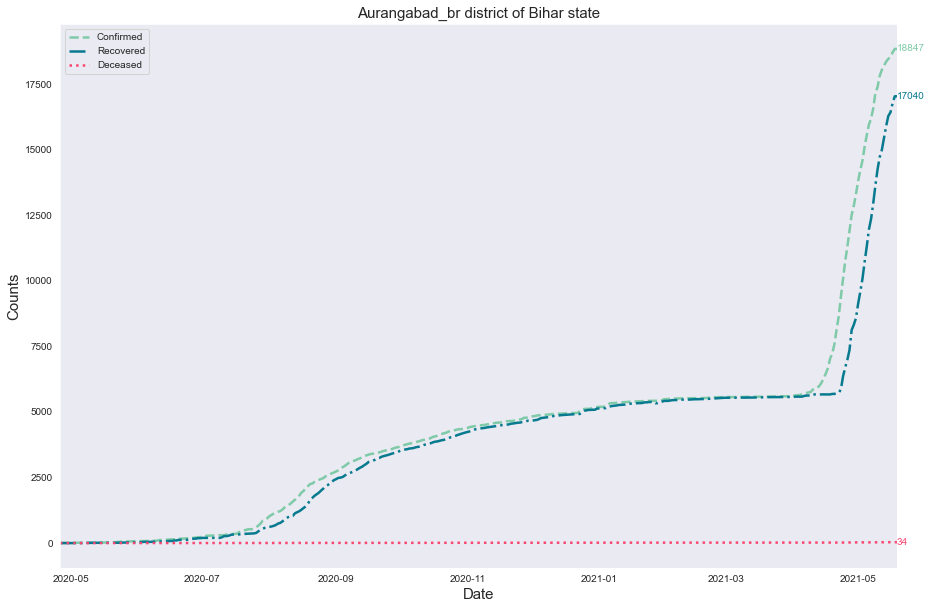

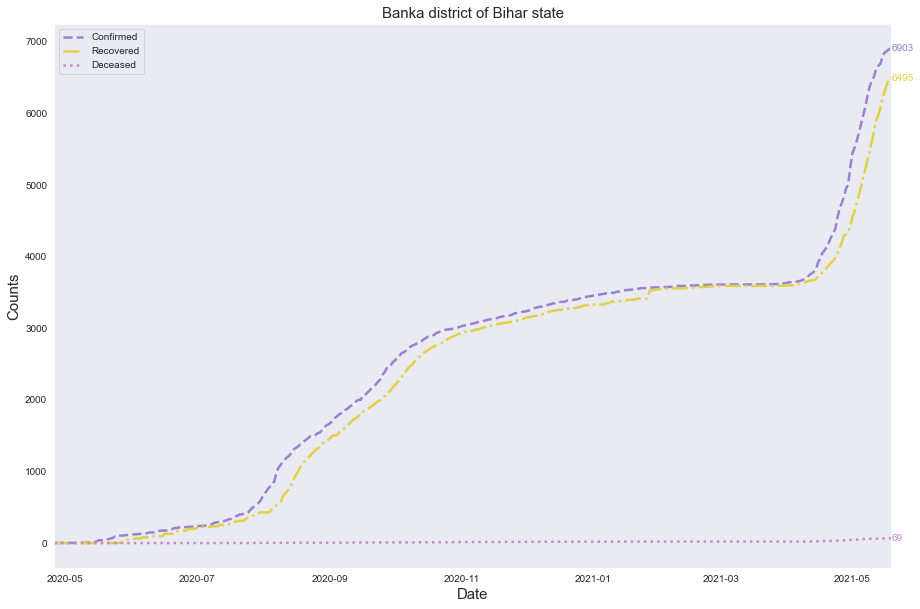

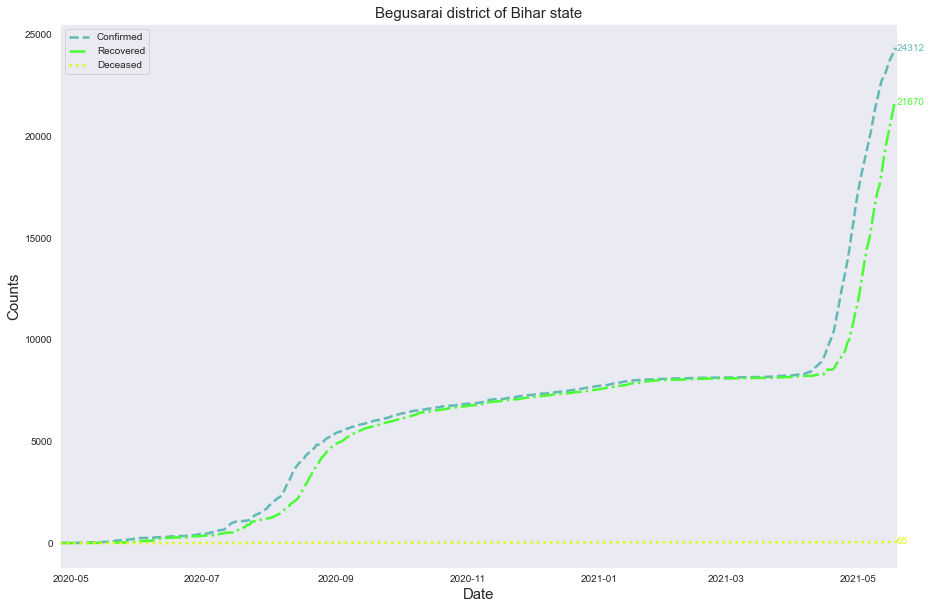

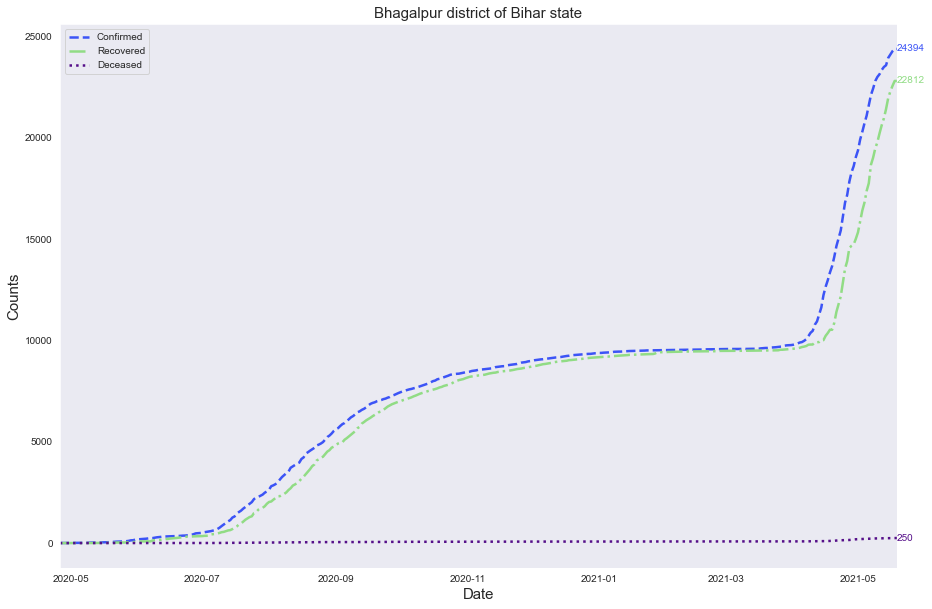

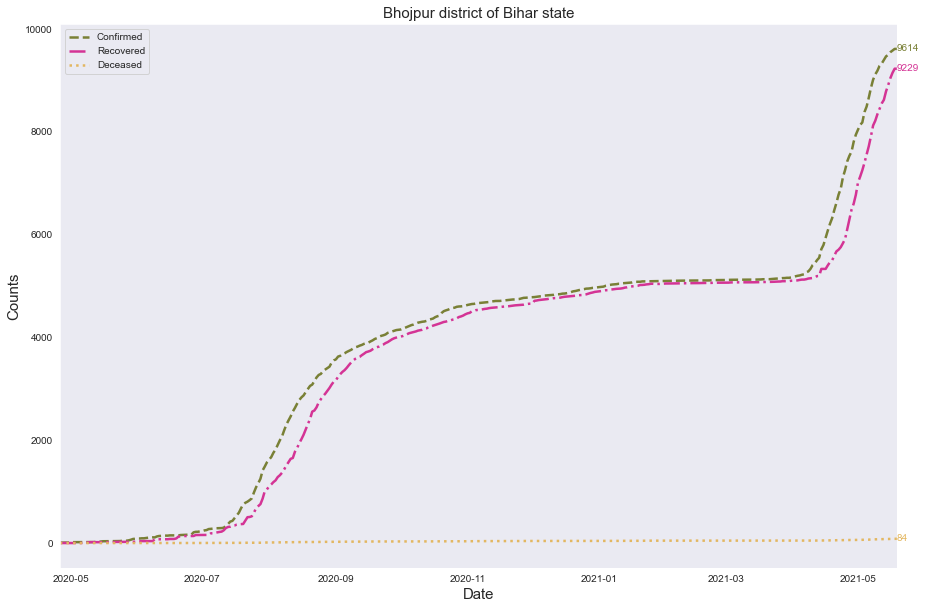

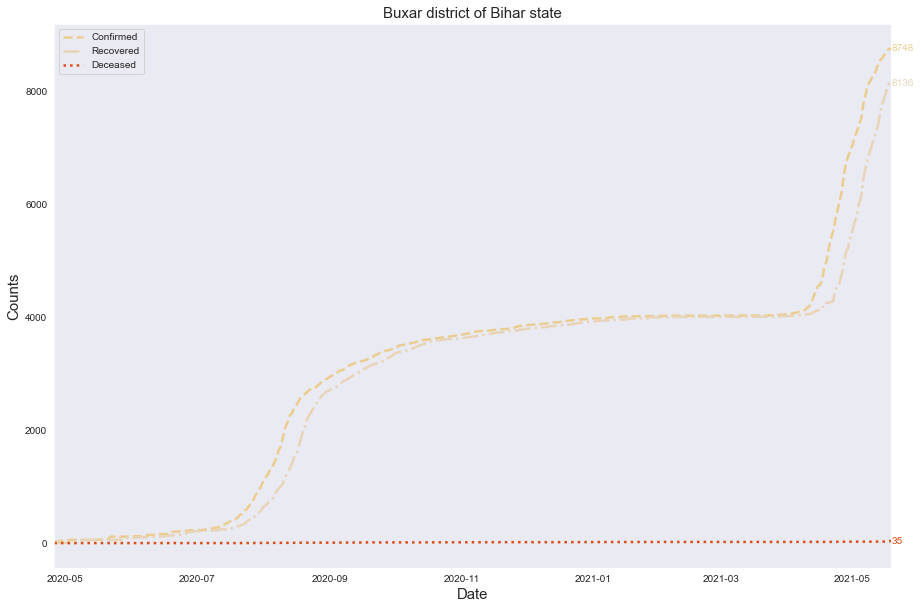

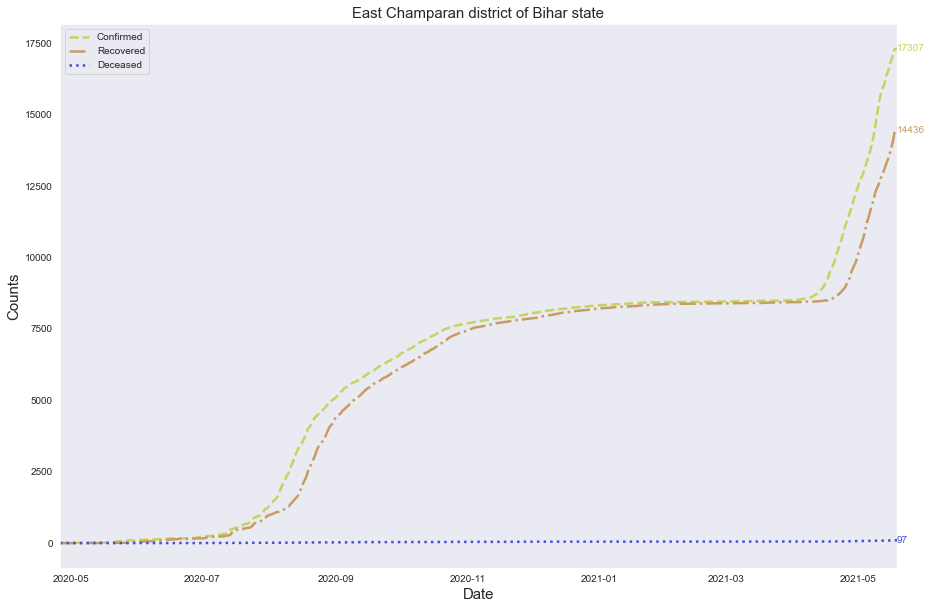

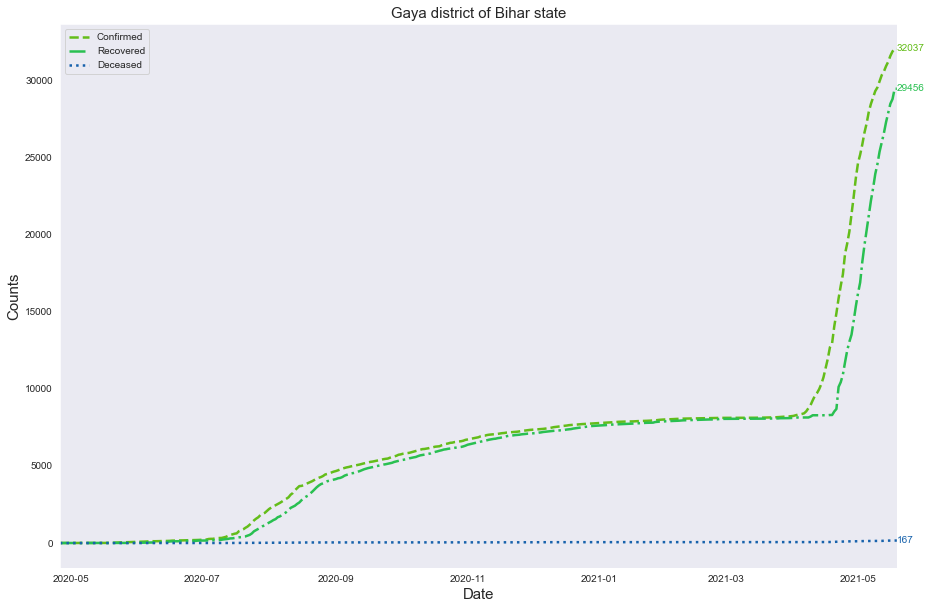

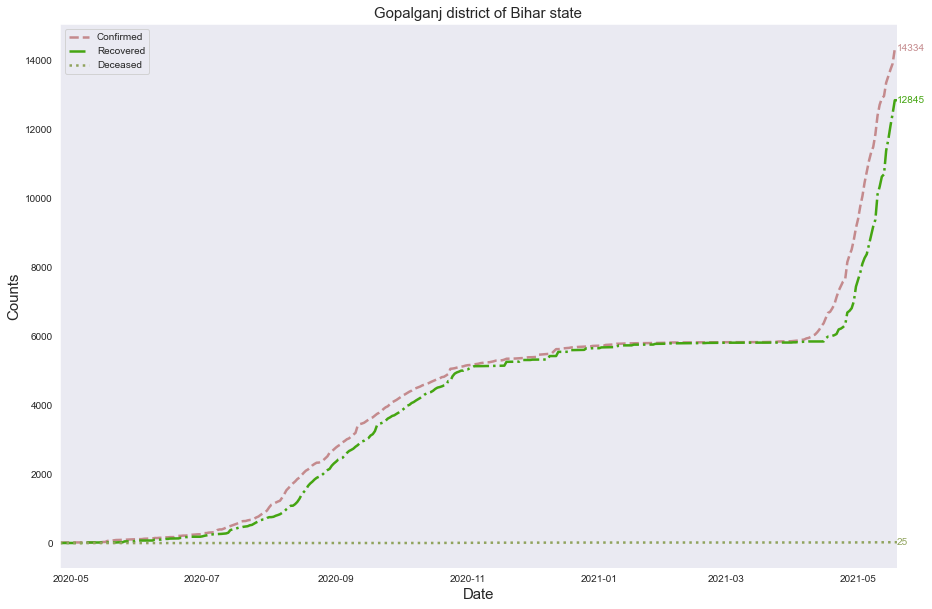

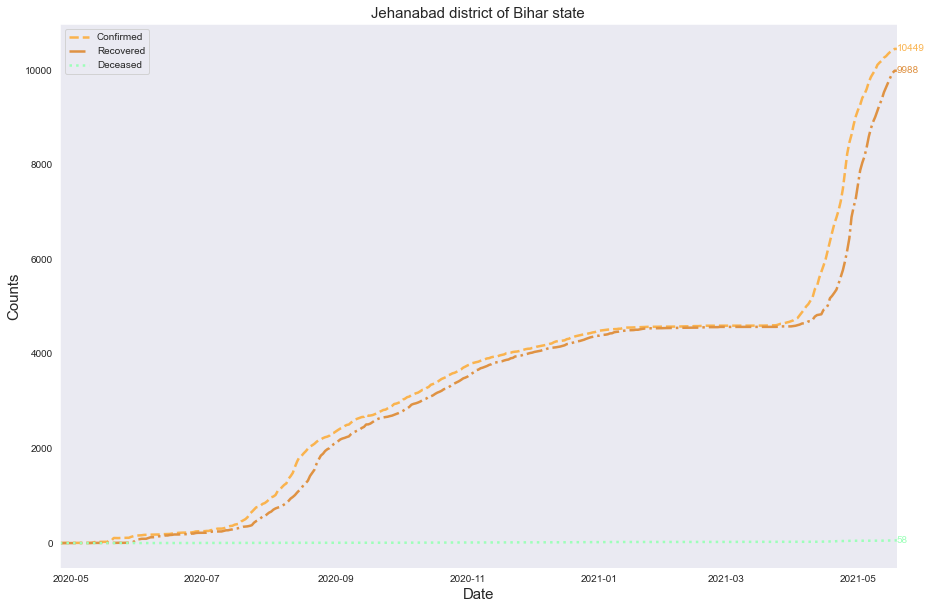

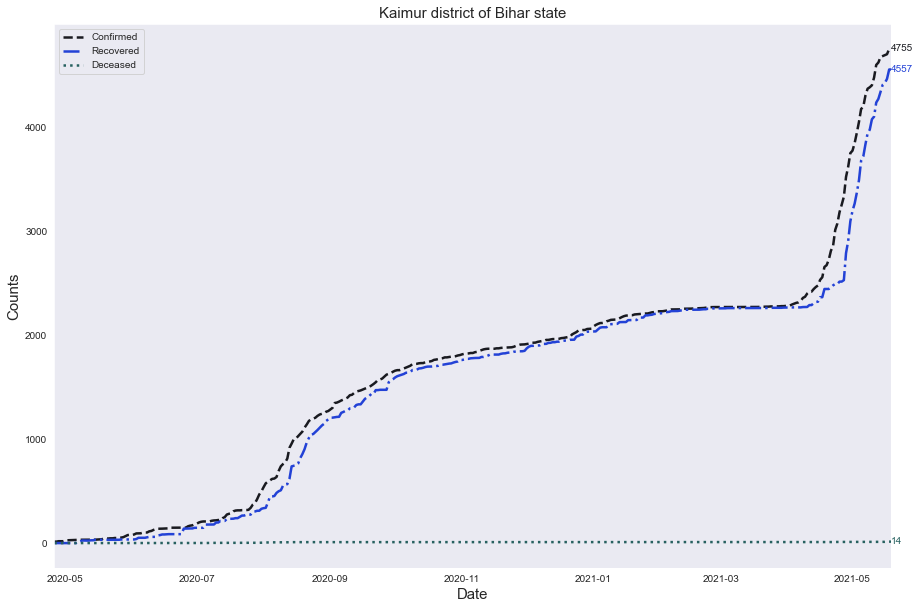

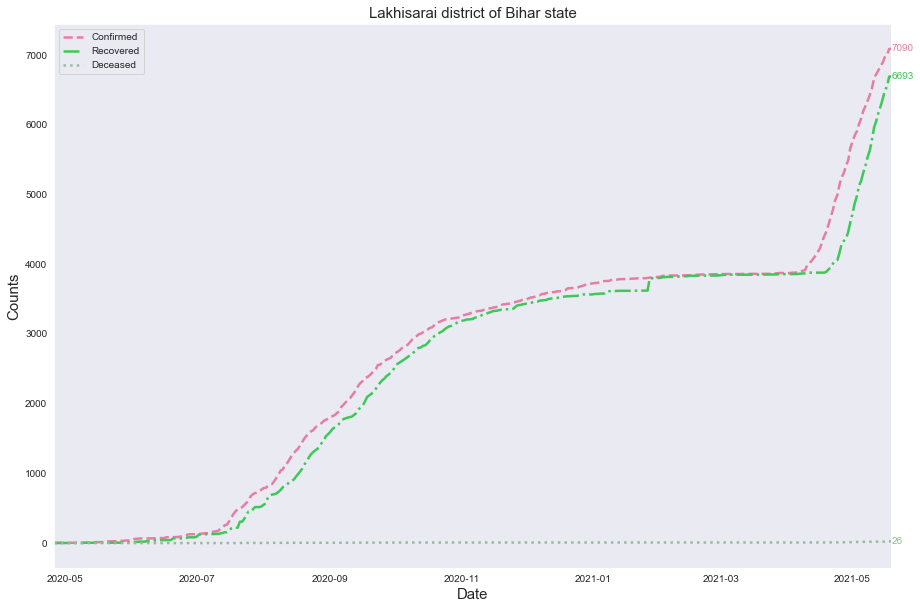

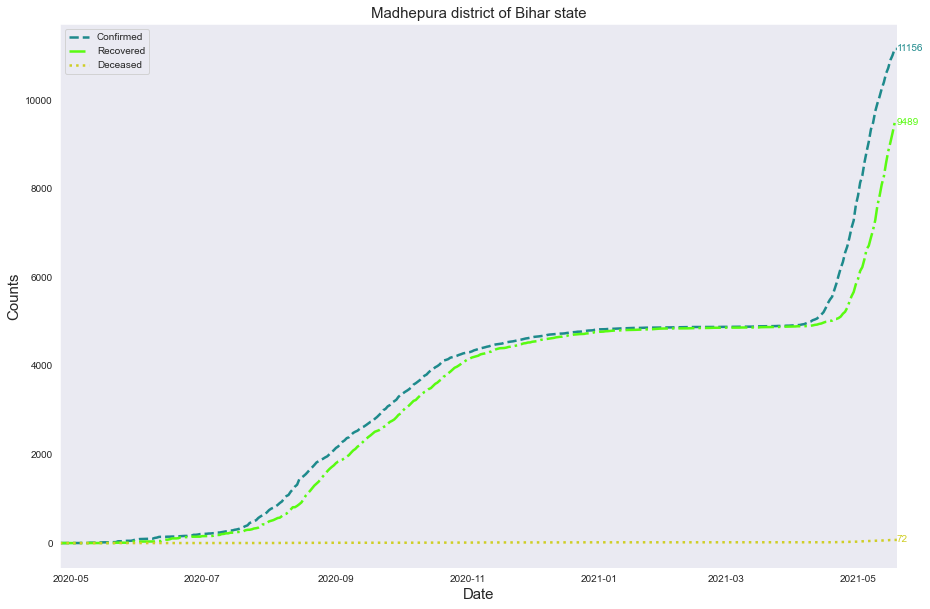

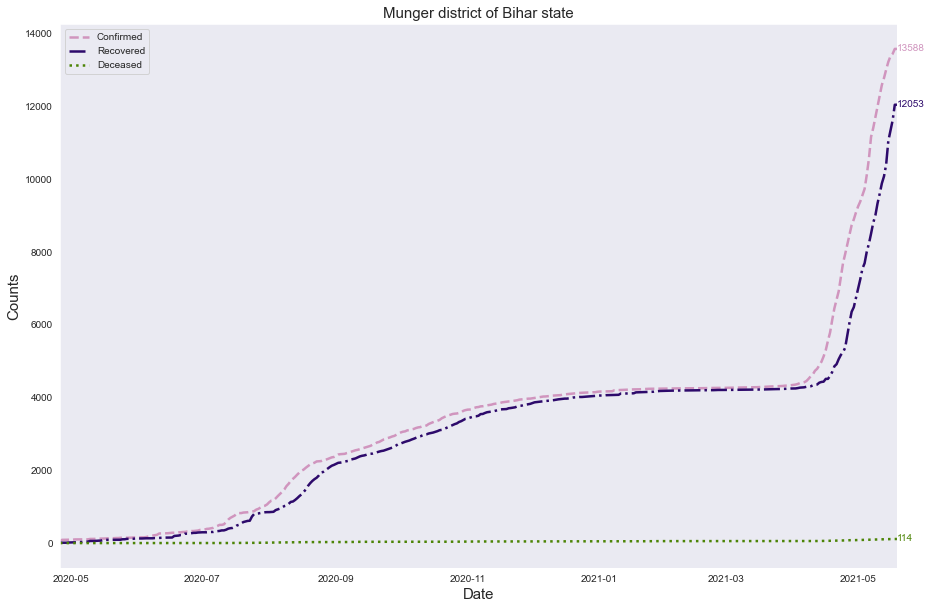

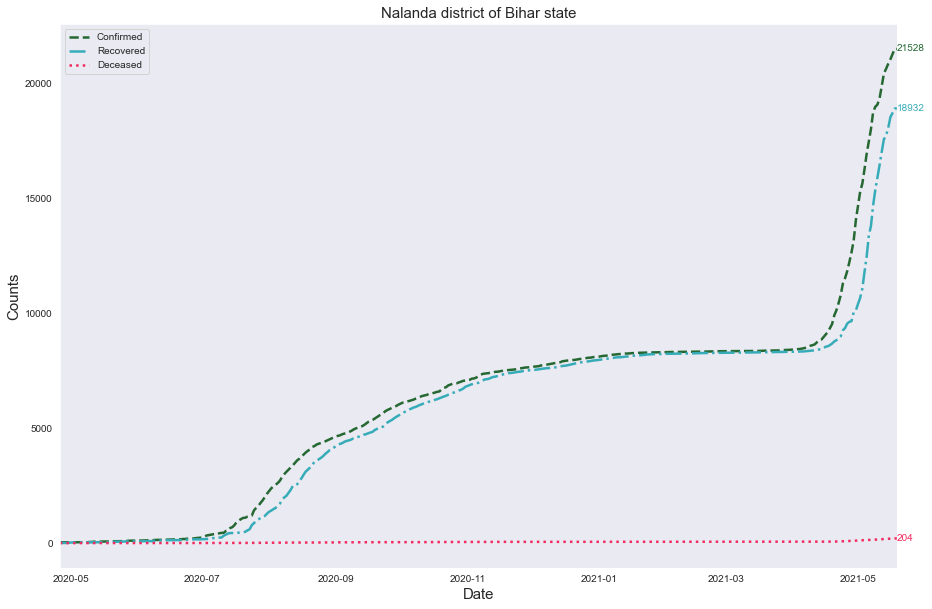

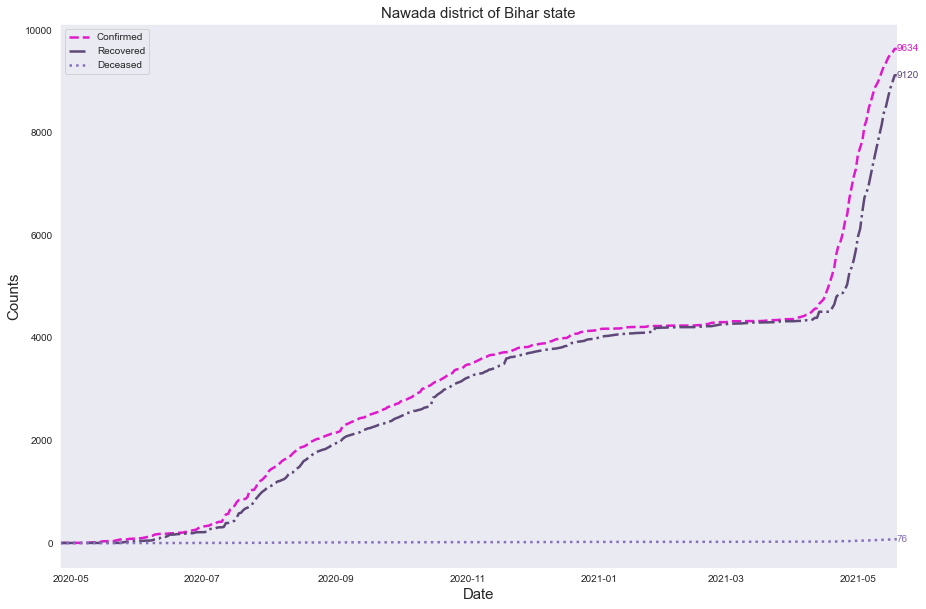

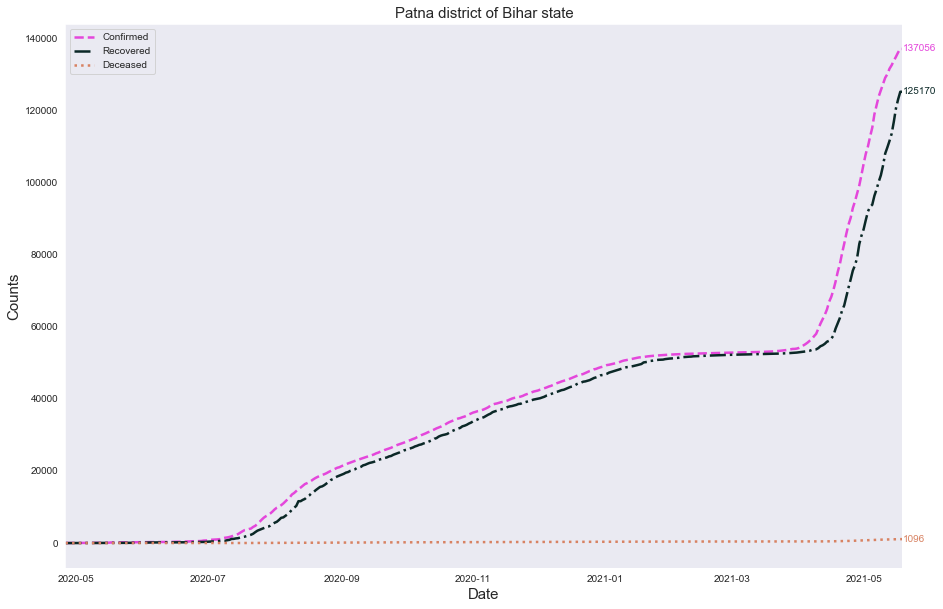

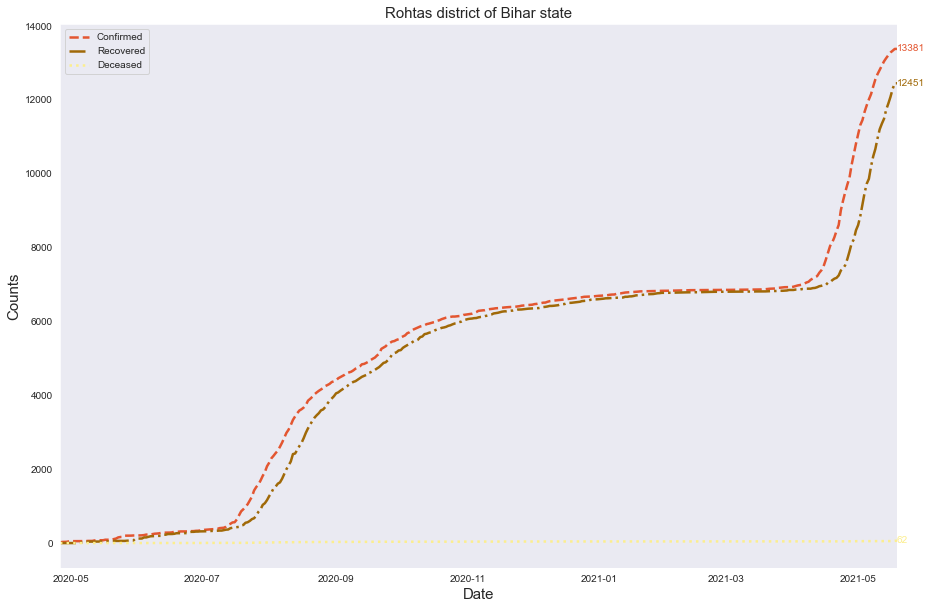

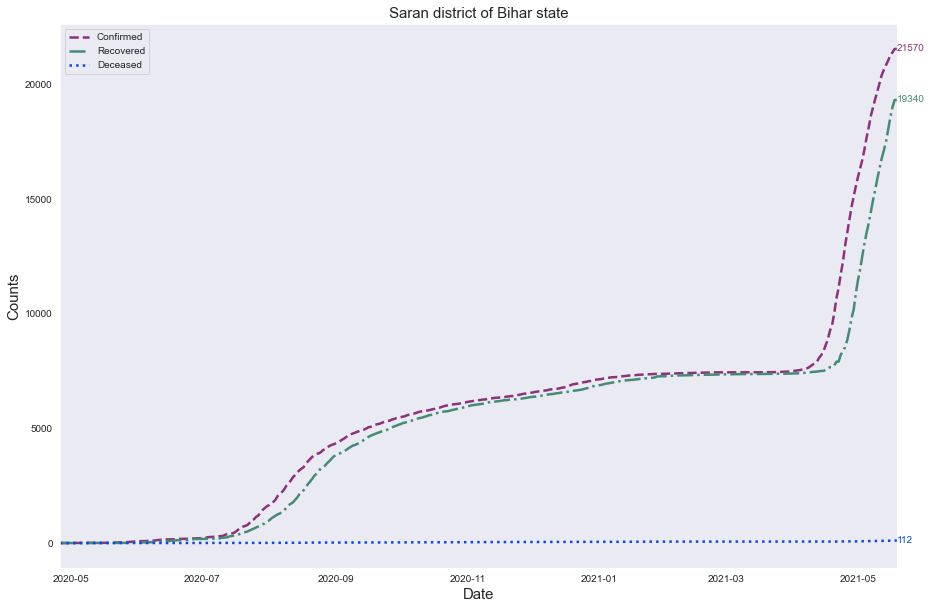

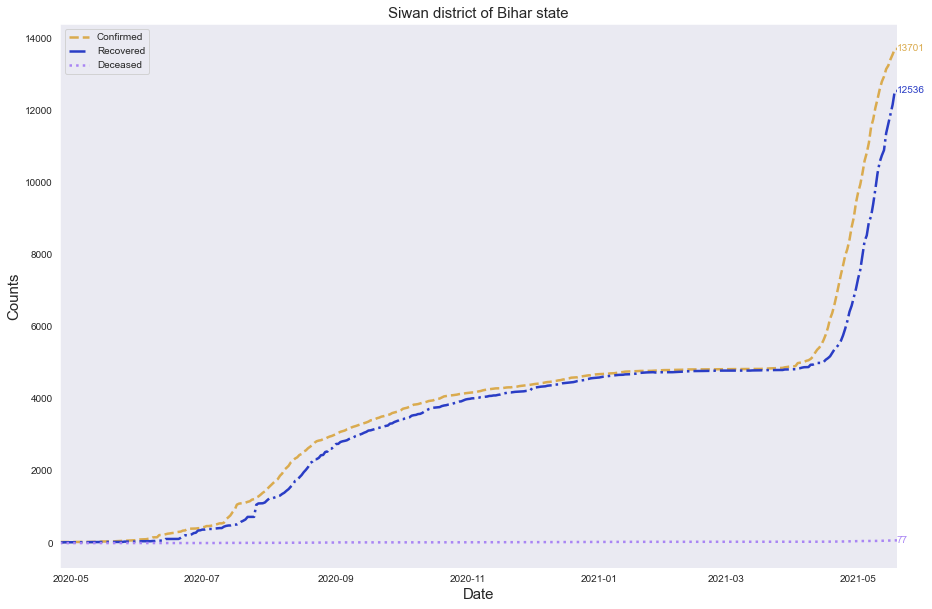

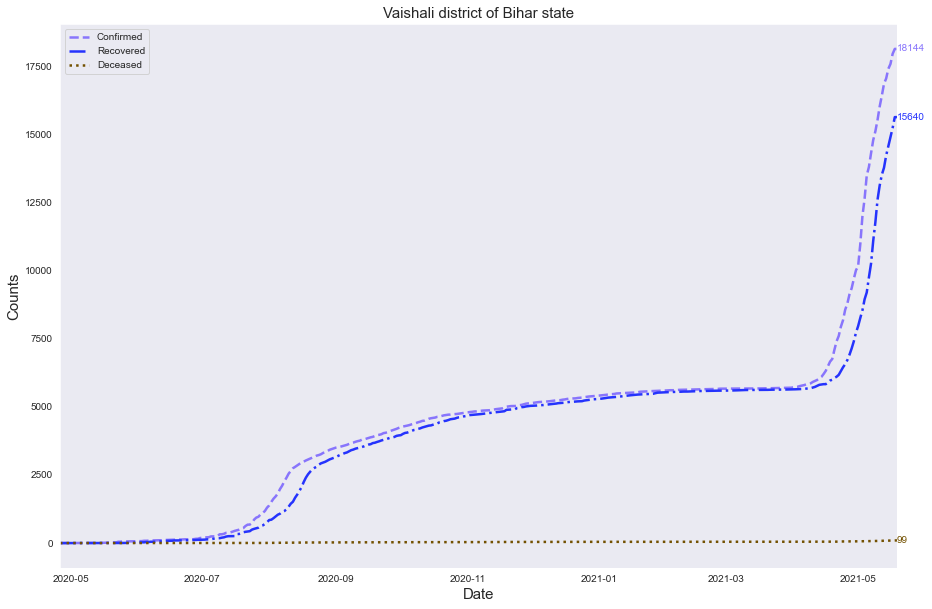

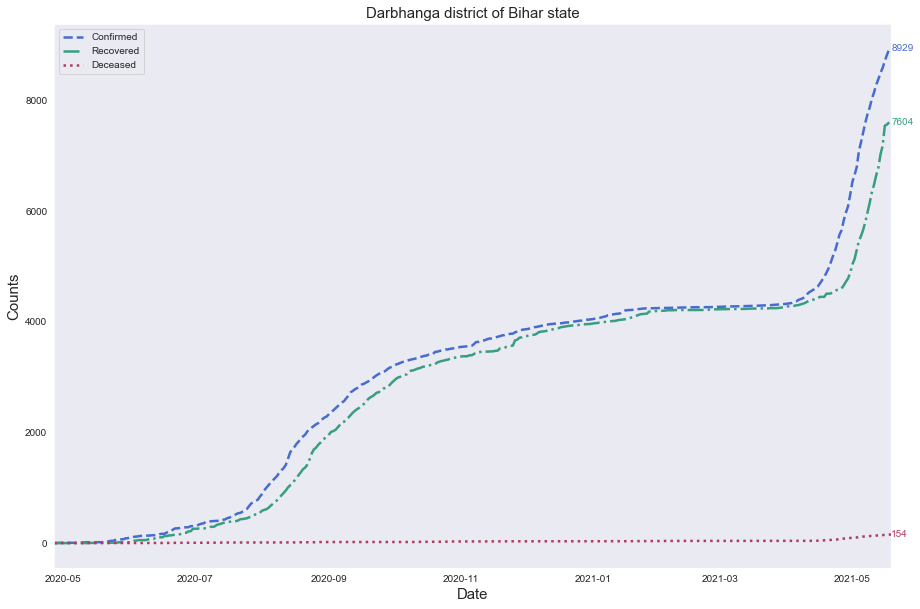

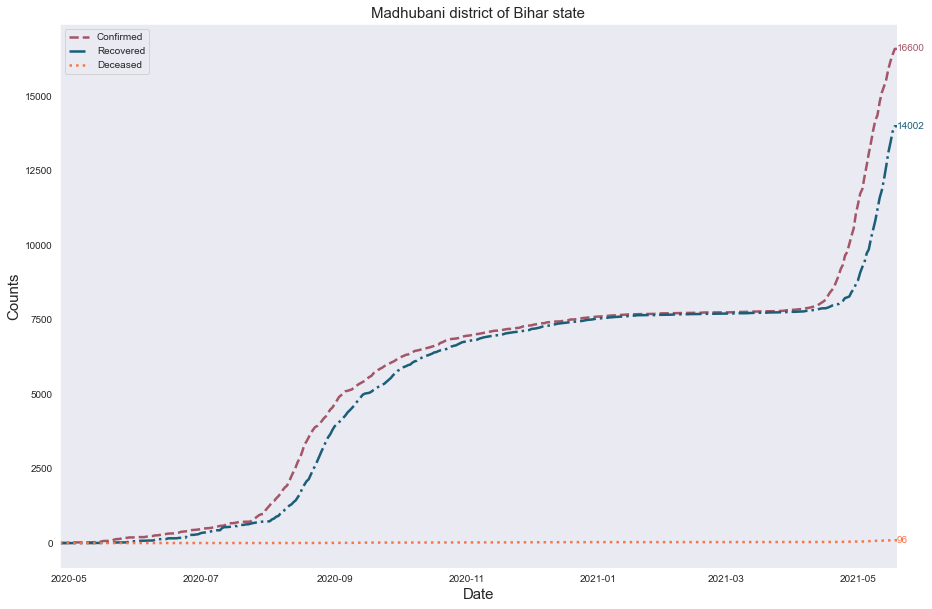

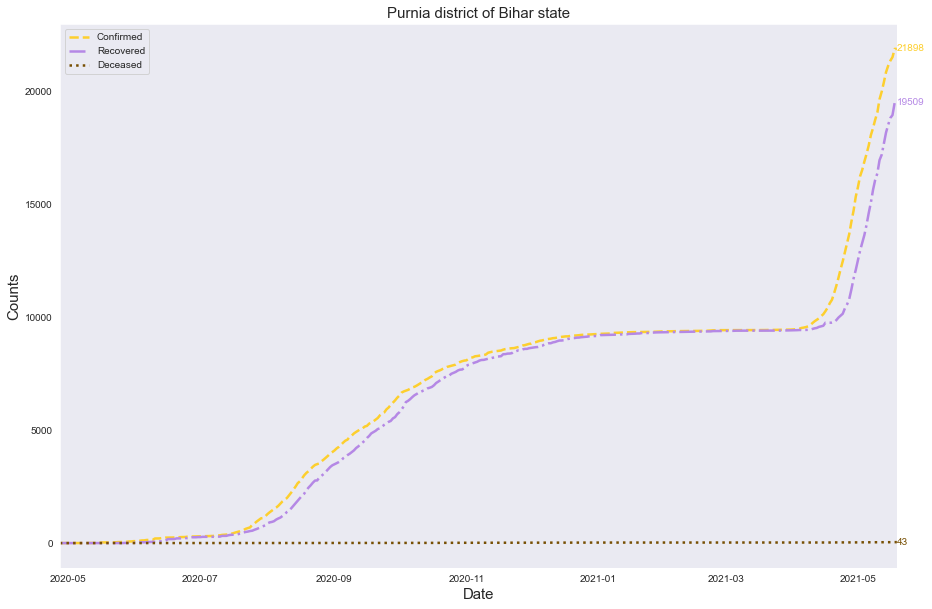

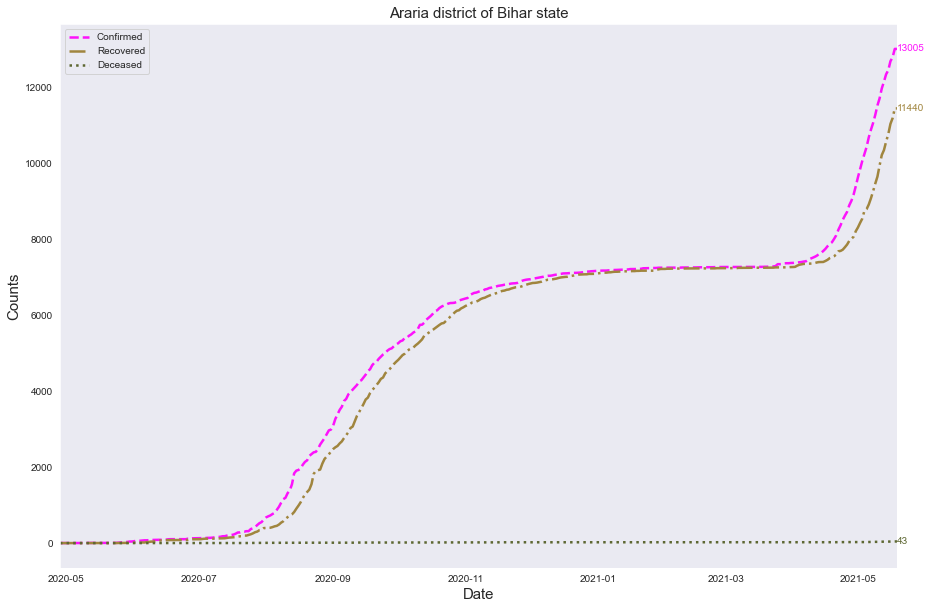

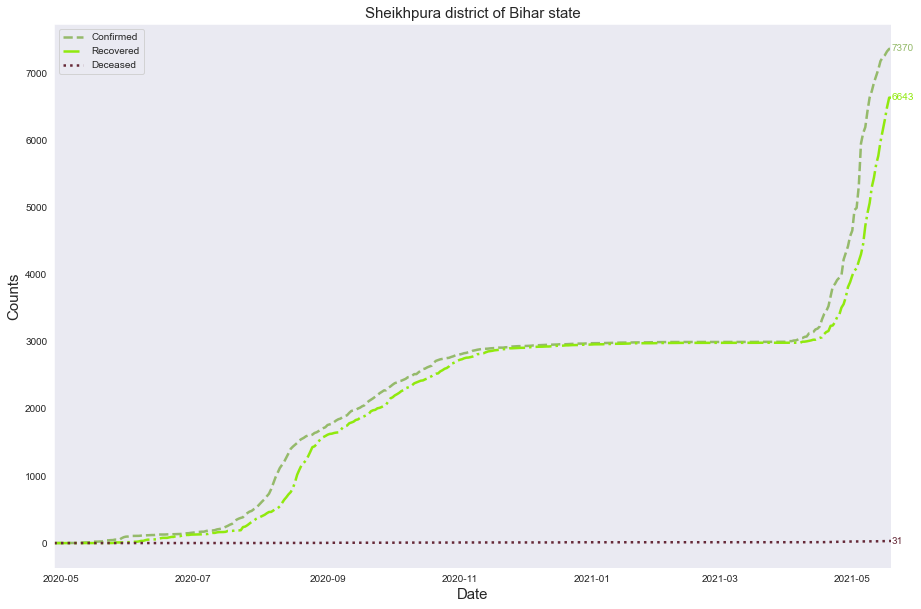

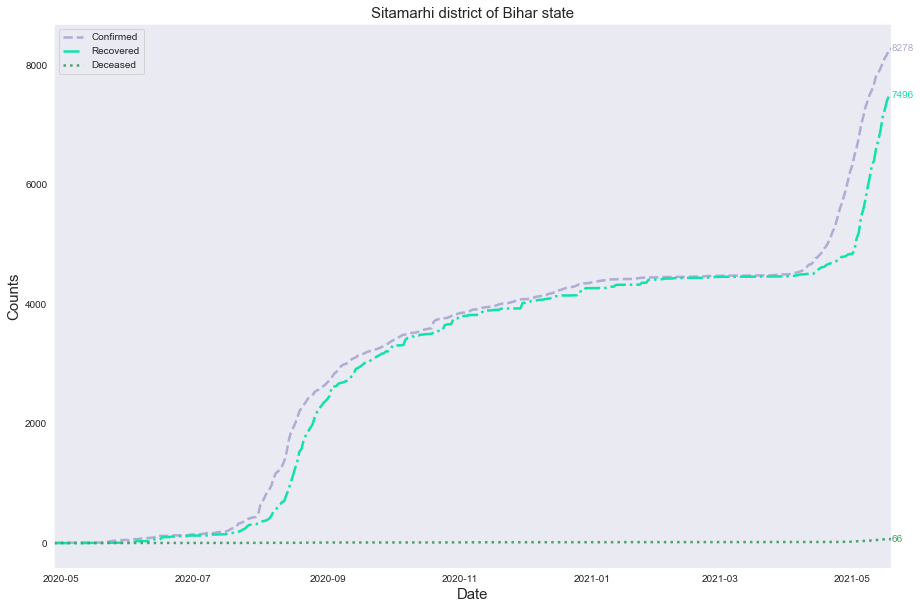

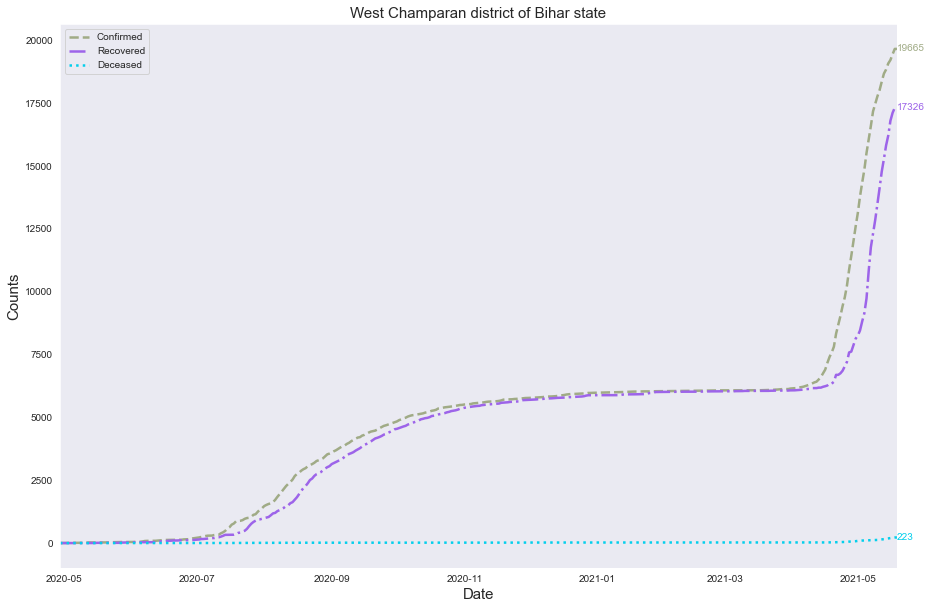

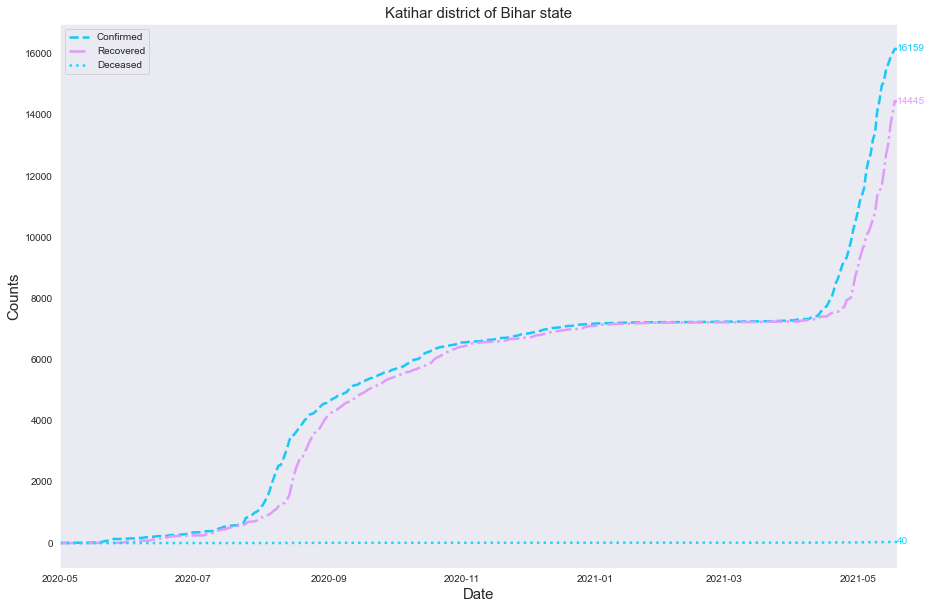

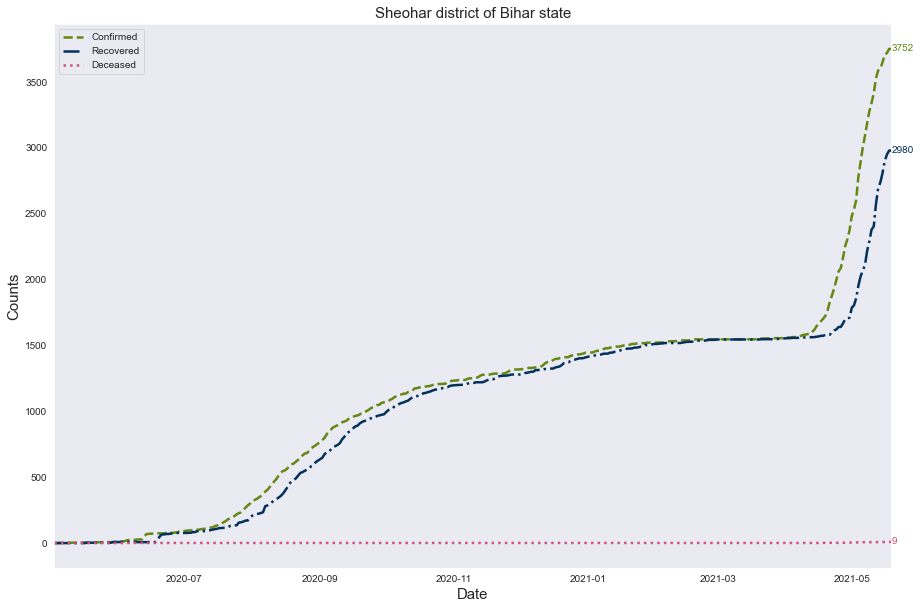

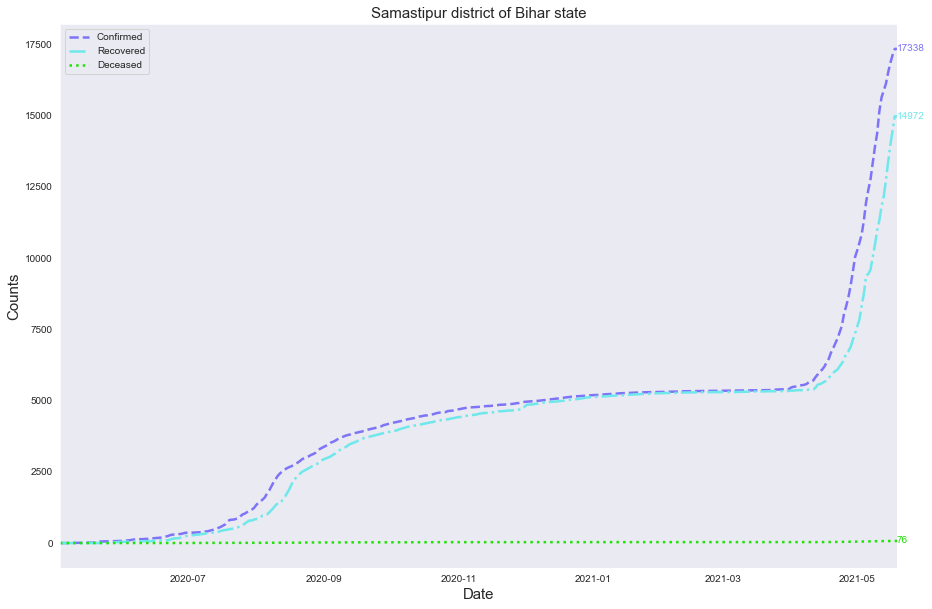

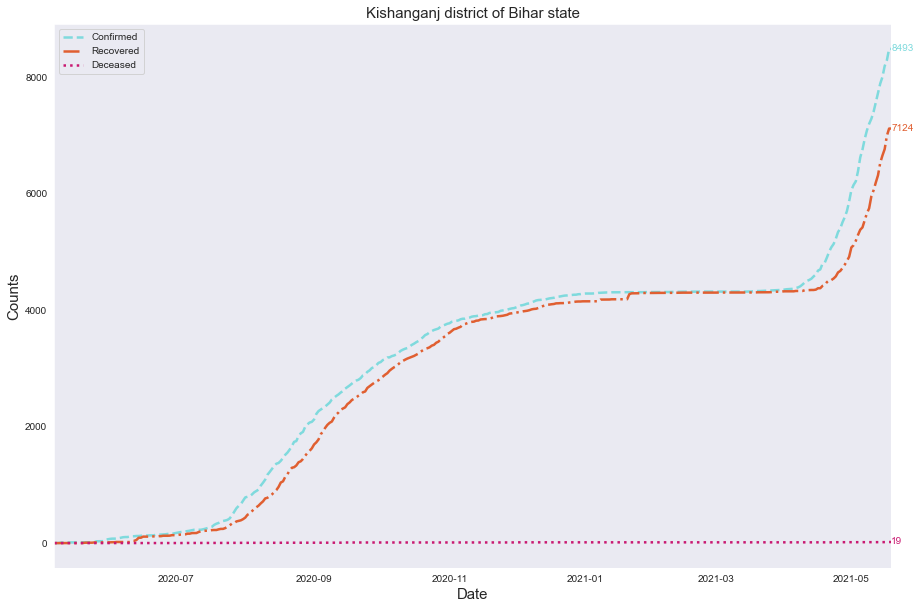

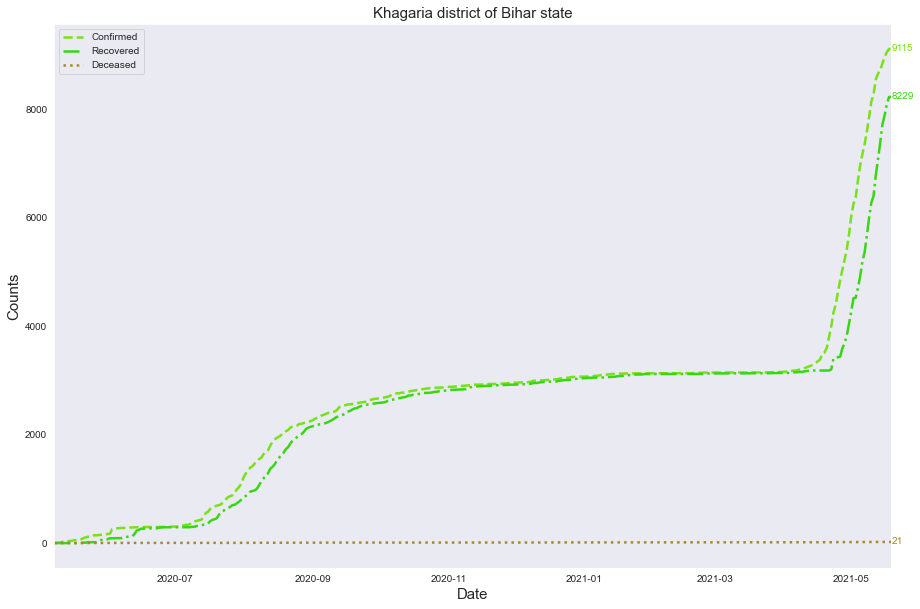

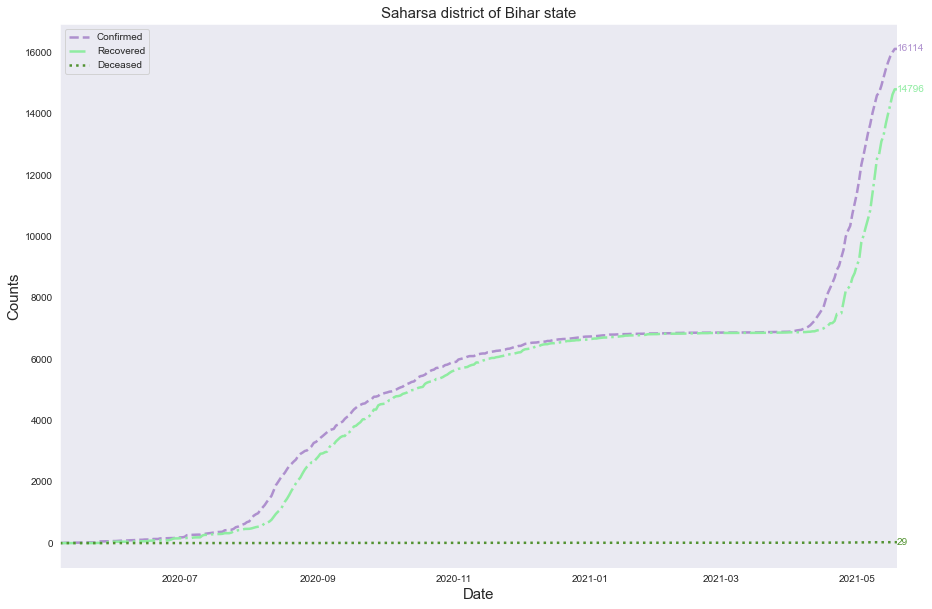

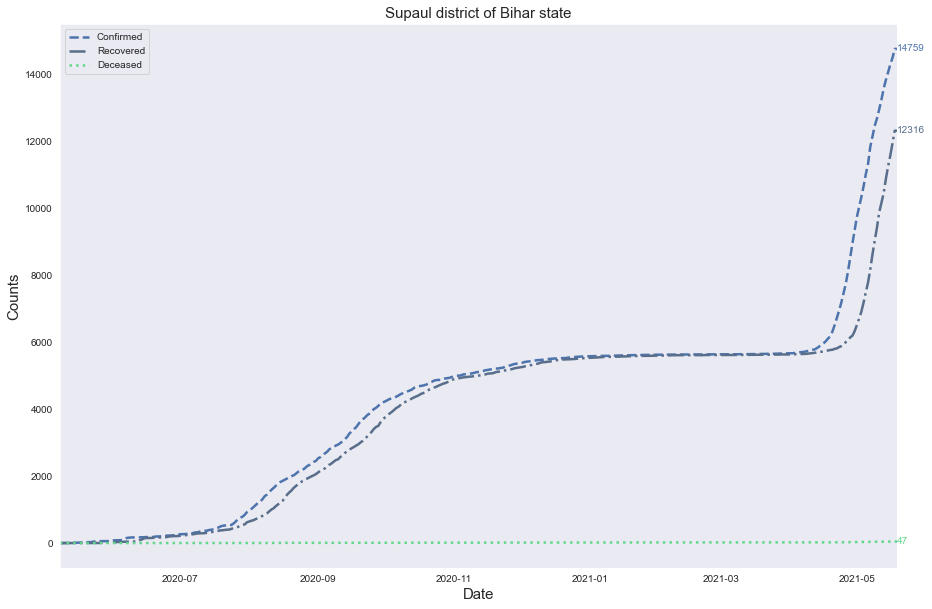

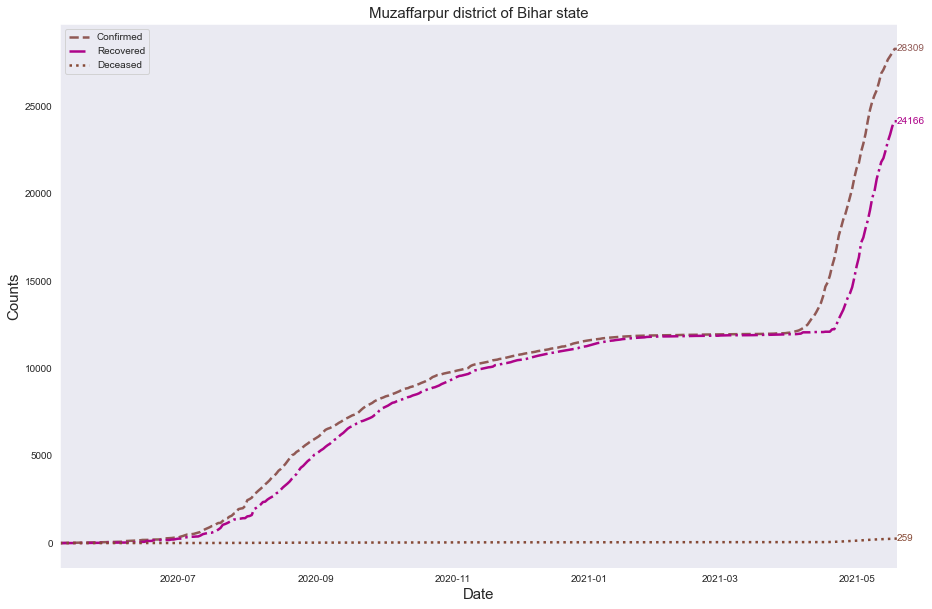

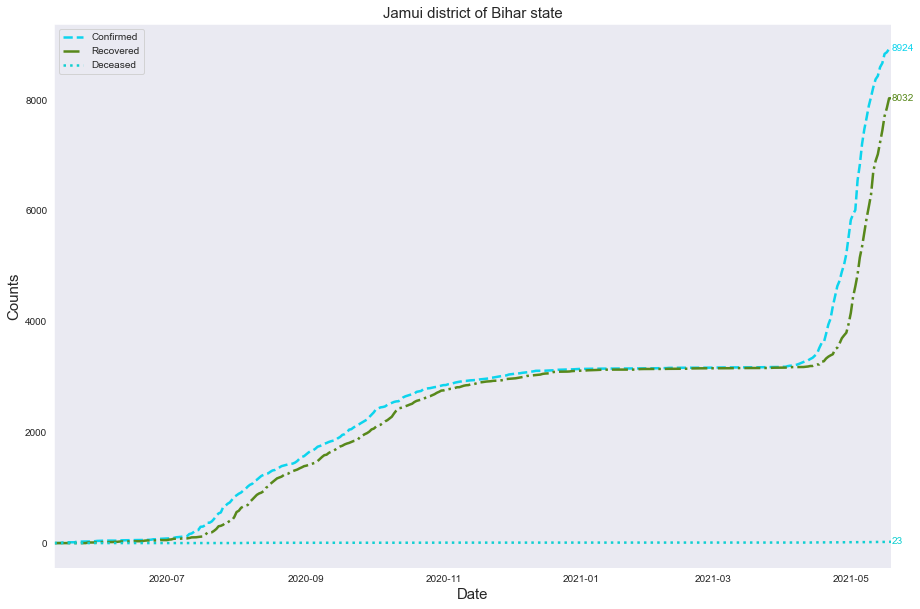

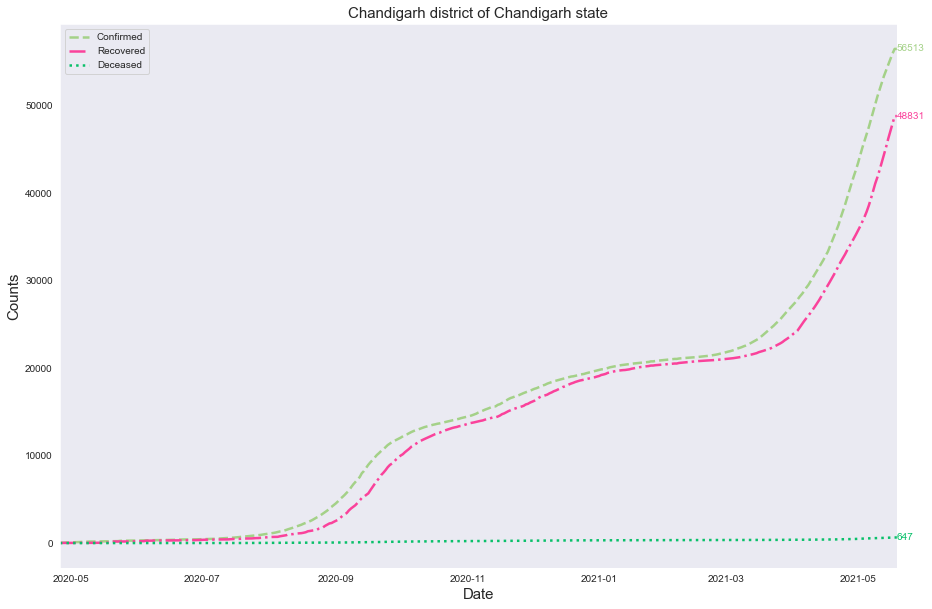

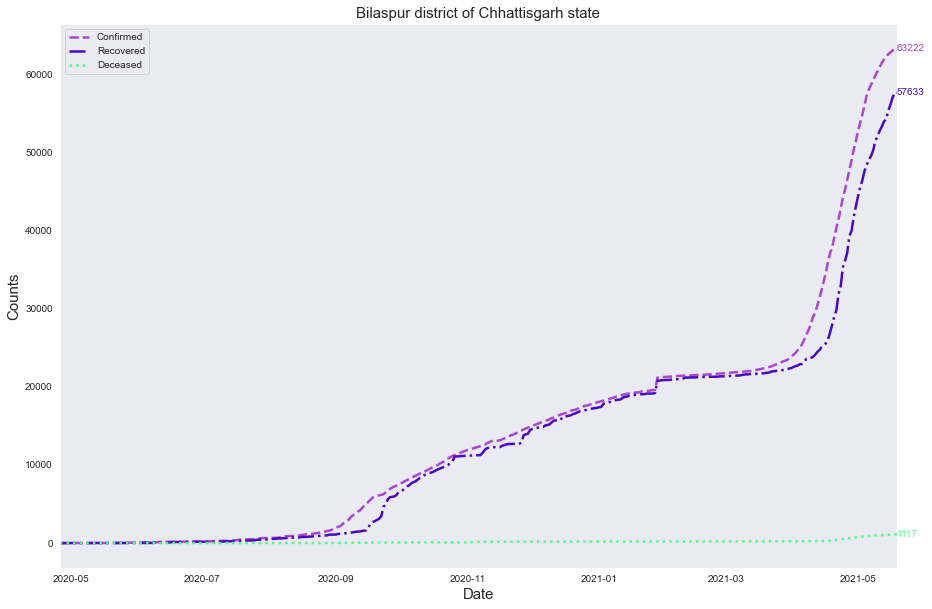

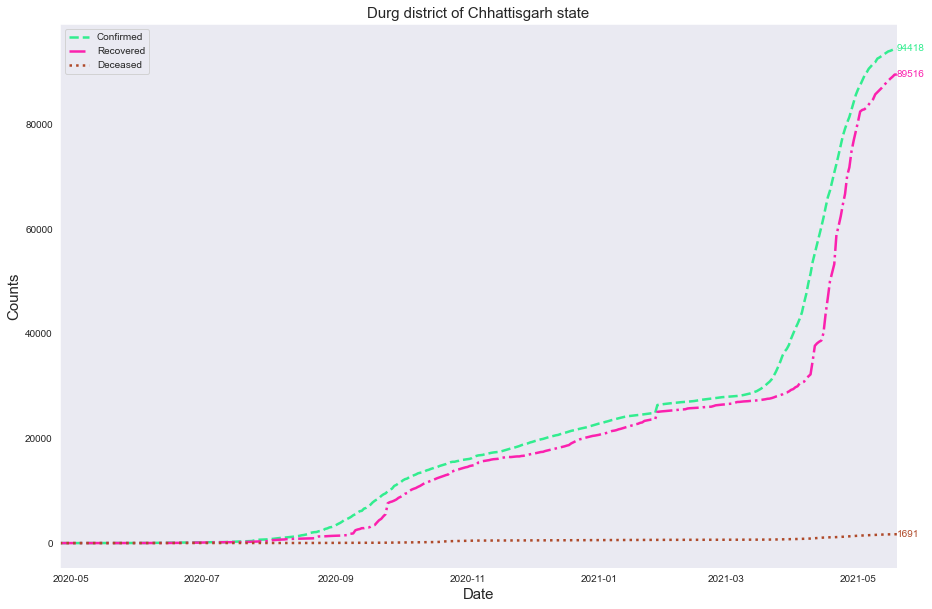

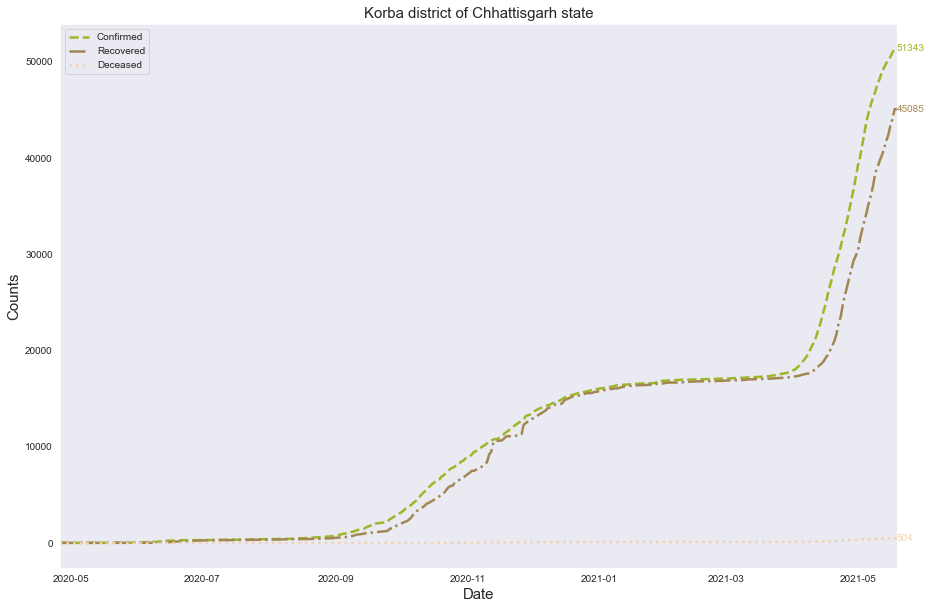

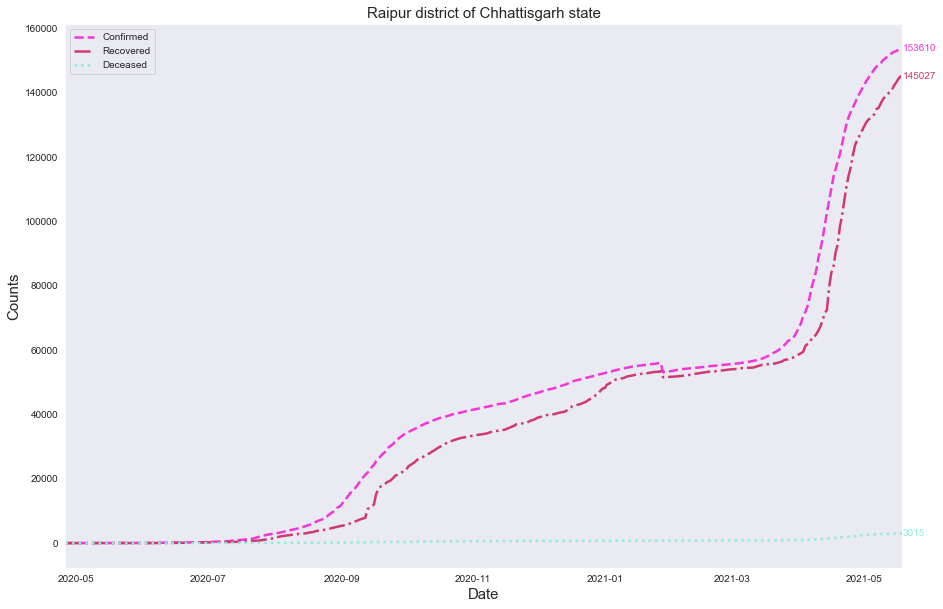

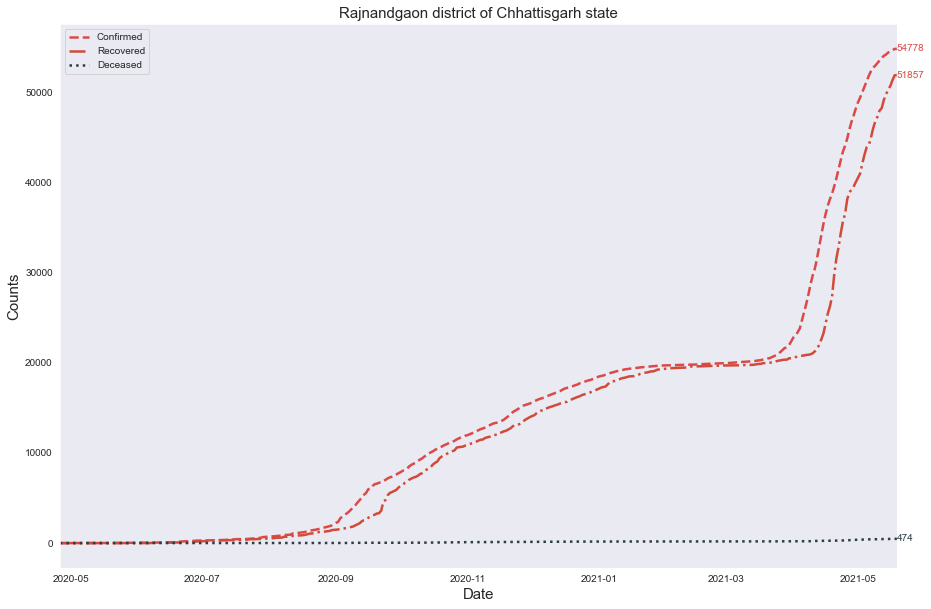

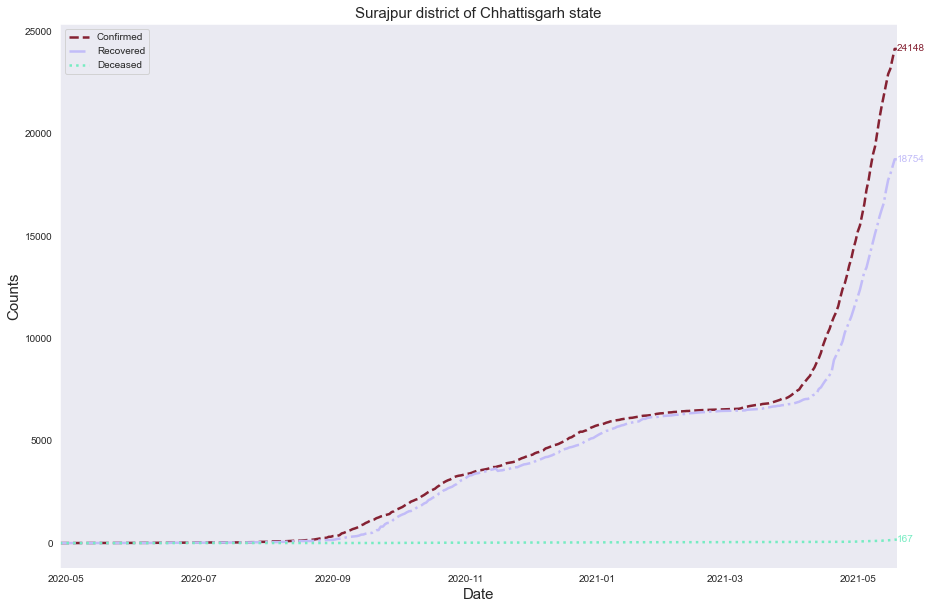

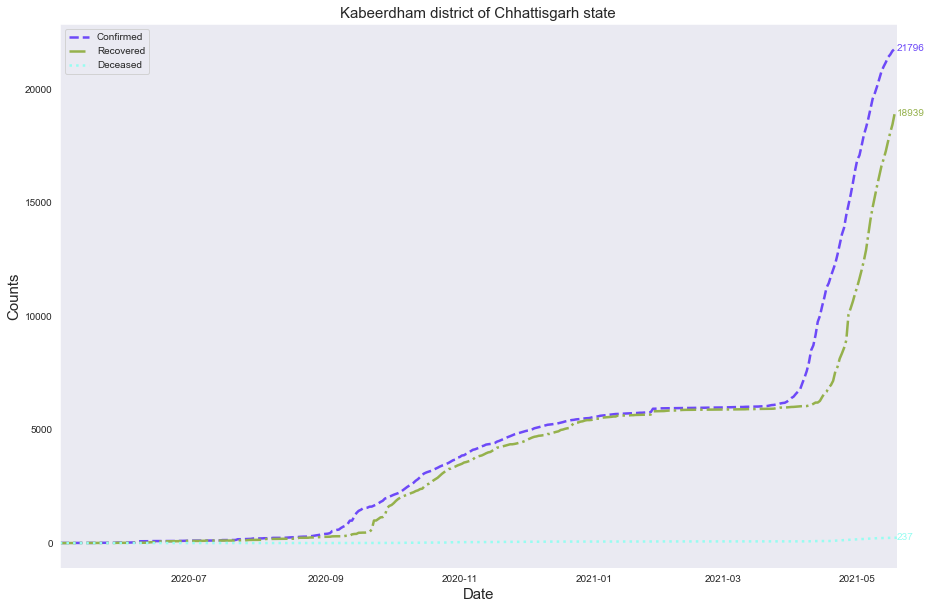

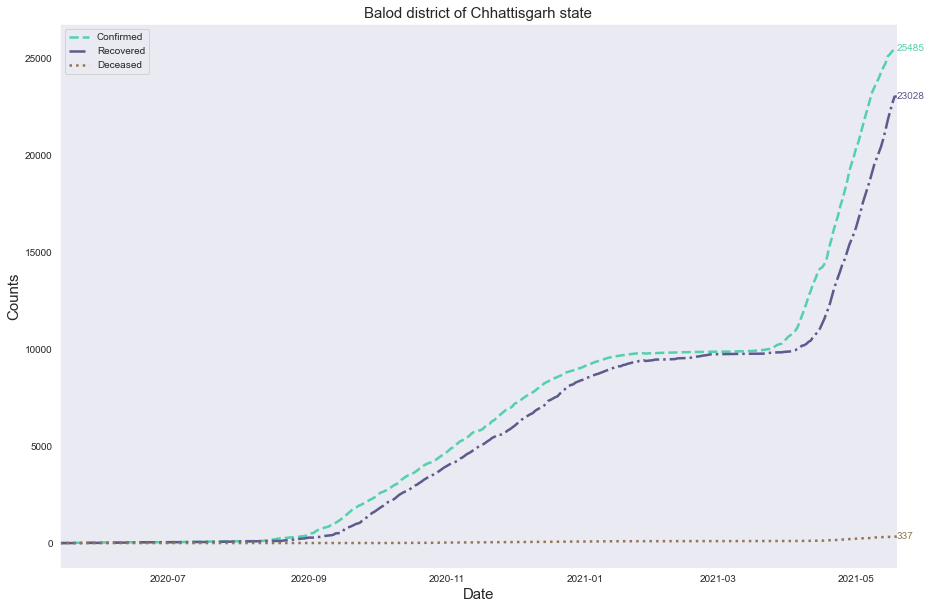

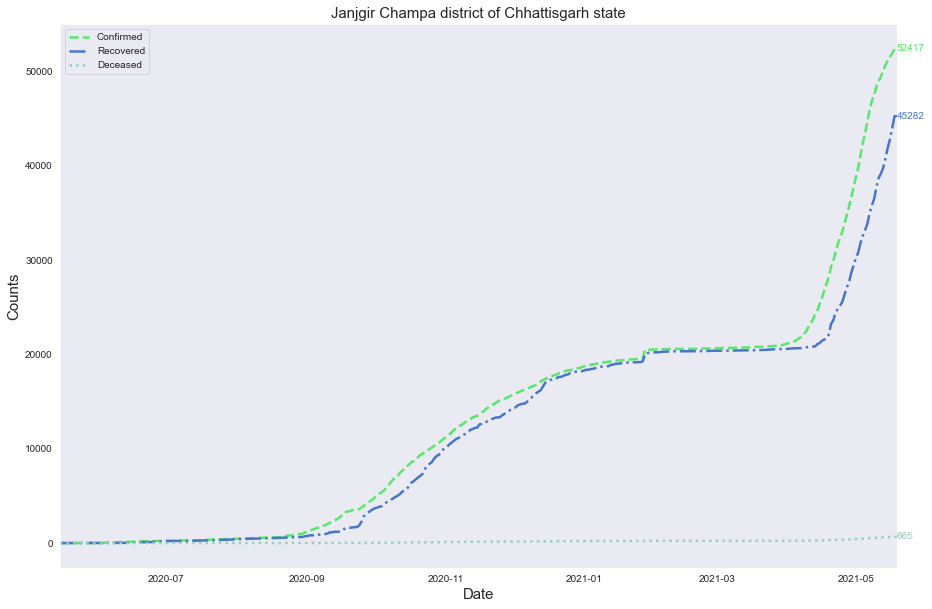

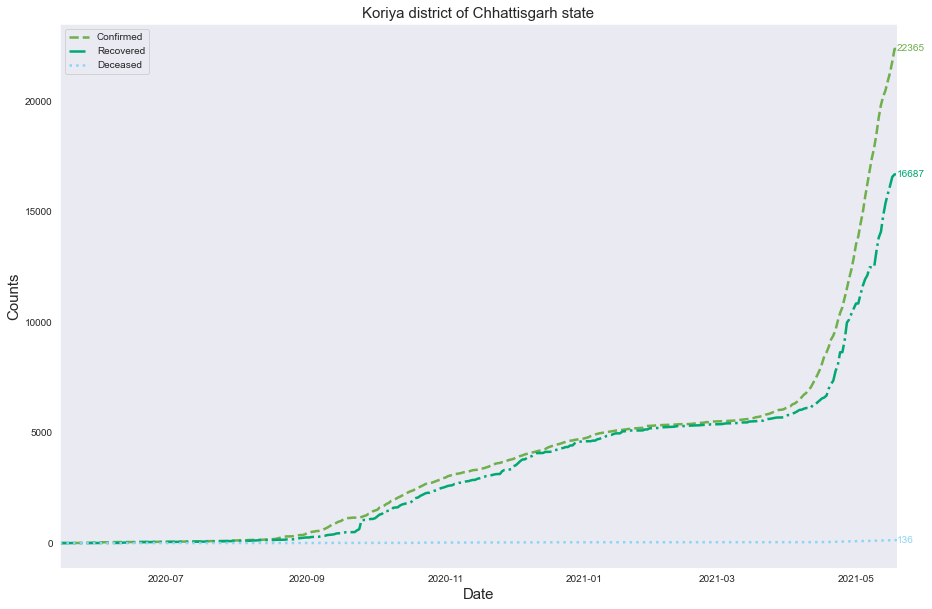

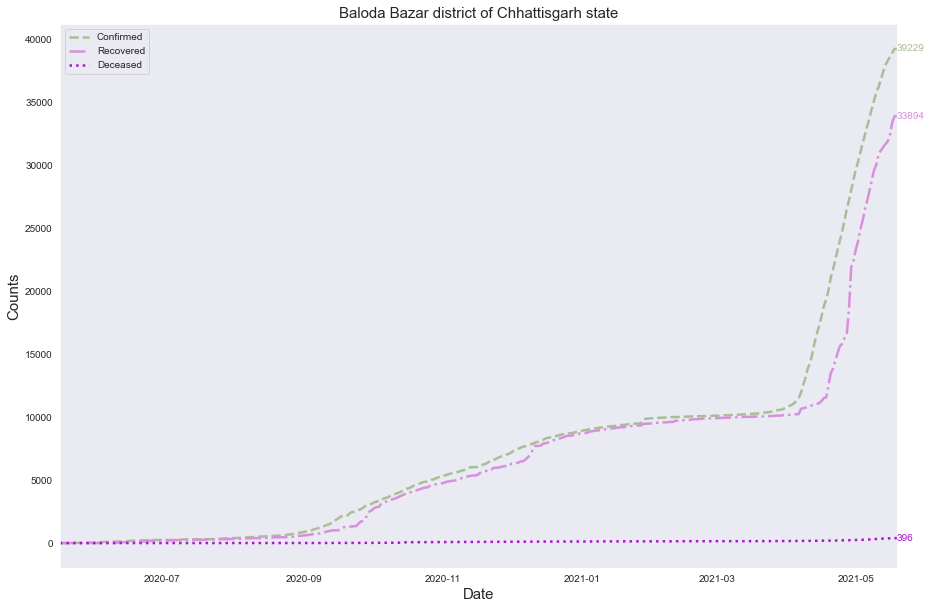

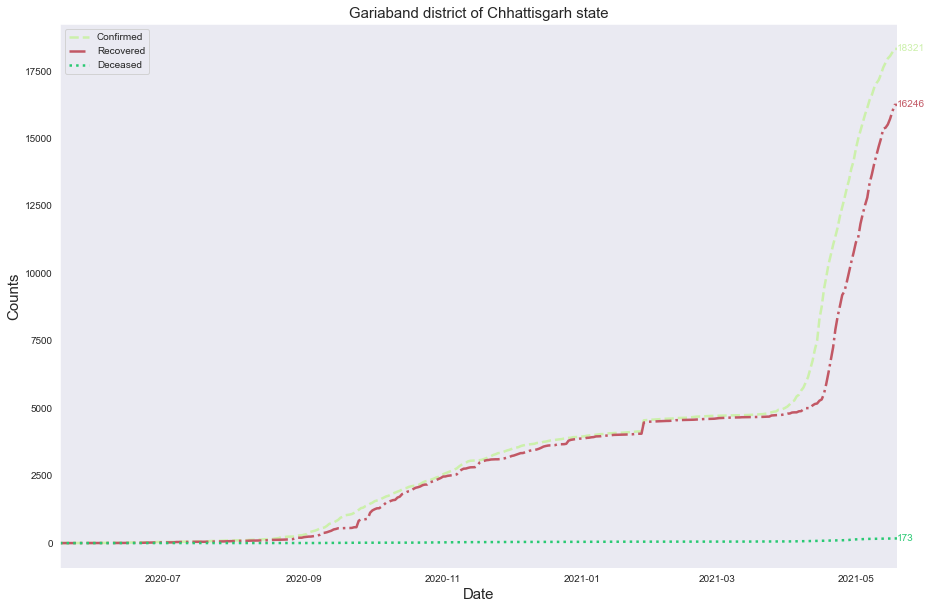

In [ ]:
%timeit
st = district['State'].unique()
for i in st:
    ds = district[district['State'] ==i]['District'].unique()
    for i in ds:
        a = district[district['District'] == i]
        a['Date'] = pd.to_datetime(a['Date'], format = ('%Y-%m-%d'))
        plt.figure(figsize = (15, 10))
        sns.set_style("dark")
        rgb = np.random.rand(3,)
        rgb1 = np.random.rand(3,)
        rgb2 = np.random.rand(3,)

        ax = sns.lineplot( a['Date'], a['Confirmed'], label = 'Confirmed', linestyle = '--', color = rgb, linewidth = 2.5)
        ax = sns.lineplot( a['Date'], a['Recovered'], label = 'Recovered', linestyle = '-.', color = rgb1,linewidth = 2.5)
        ax = sns.lineplot( a['Date'], a['Deceased'], label = 'Deceased', linestyle = ':', color = rgb2,linewidth = 2.5)


        for value in ax.lines:
            y = value.get_ydata()
            if len(y)>0:
                ax.annotate(f'{y[-1]:.0f}',xy=(1,y[-1]), xycoords=('axes fraction','data'),ha='left',va='center',color=value.get_color())

        ax.set_xlim(a['Date'].iloc[0], a['Date'].iloc[-1])
        plt.ylabel('Counts', fontsize = 15)
        plt.xlabel('Date', fontsize = 15)
        plt.title('{} district of {} state'.format(a['District'].iloc[0], a['State'].iloc[0]), fontsize = 15)

        plt.savefig(os.path.join('DIST_'+ today.strftime('%d-%m-%Y'), '{}.png'.format(i)))

### Districts 

In [ ]:
#---------------Andaman & Nicobar------------------------------------
an = ['Unknown_AN']
ga = ['Unknown_GA']
sk = ['Unknown_SK']
aS = ['Unknown_AS']
mn = ['Unknown_MN']
ts = ['Unknown_TS']

#----------------Andhra Pradesh--------------------------
ap = ['Anantapur' ,'Chittoor', 'East Godavari', 'Guntur', 'Krishna', 'Kurnool','Prakasam', 'S.P.S. Nellore', 'Srikakulam' ,
      'Visakhapatnam', 'West Godavari', 'Y.S.R. Kadapa', 'Vizianagaram']
#----------------Arunachal Pradesh--------------------------
ar = ['Lohit' ,'Papum Pare', 'Changlang', 'Anjaw' ,'Capital Complex', 'East Kameng','East Siang', 'Kamle' ,'Kra Daadi', 
      'Kurung Kumey', 'Lepa Rada' ,'Longding','Lower Dibang Valley', 'Lower Siang', 'Lower Subansiri', 'Namsai','Pakke Kessang'
      ,'Shi Yomi' ,'Siang' ,'Tawang' ,'Tirap' ,'Upper Dibang Valley', 'Upper Siang', 'Upper Subansiri', 'West Kameng' 
      ,'West Siang']
#----------------Bihar--------------------------
br = ['Arwal' ,'Aurangabad_br' ,'Banka', 'Begusarai', 'Bhagalpur' ,'Bhojpur', 'Buxar','East Champaran' ,'Gaya' ,'Gopalganj', 
      'Jehanabad' ,'Kaimur', 'Lakhisarai','Madhepura', 'Munger', 'Nalanda' ,'Nawada' ,'Patna', 'Rohtas', 'Saran', 'Siwan',
     'Vaishali' ,'Darbhanga' ,'Madhubani' ,'Purnia','Araria', 'Sheikhpura','Sitamarhi' ,'West Champaran', 'Katihar' ,'Sheohar' 
      ,'Samastipur','Kishanganj' ,'Khagaria' ,'Saharsa' ,'Supaul' ,'Muzaffarpur' ,'Jamui']
#----------------Chandigarh--------------------------
ch = ['Chandigarh']
#----------------Chhattisgarh--------------------------
cg = ['Bilaspur', 'Durg','Korba', 'Raipur', 'Rajnandgaon' ,'Surajpur', 'Kabeerdham', 'Balod', 'Janjgir Champa' ,'Koriya', 
      'Baloda Bazar', 'Gariaband' ,'Raigarh','Surguja', 'Balrampur_cg' ,'Bametara' ,'Bastar' ,'Bijapur','Dakshin Bastar Dantewada' 
      ,'Dhamtari' ,'Jashpur', 'Kondagaon' ,'Mahasamund','Mungeli', 'Narayanpur' ,'Sukma' ,'Uttar Bastar Kanker' 
      ,'Gaurela Pendra Marwahi' ]
#----------------Delhi--------------------------
dl = ['Delhi']
#----------------Gujarat--------------------------
gj = ['Ahmedabad', 'Anand' ,'Aravalli' ,'Banaskantha', 'Bharuch', 'Bhavnagar','Botad', 'Chhota Udaipur', 'Dahod',
      'Dang', 'Gandhinagar', 'Gir Somnath','Jamnagar', 'Kheda', 'Kutch', 'Mahisagar', 'Mehsana', 'Morbi', 'Narmada', 
      'Navsari', 'Panchmahal', 'Patan', 'Porbandar' ,'Rajkot', 'Sabarkantha', 'Surat', 'Surendranagar' ,'Tapi', 
      'Vadodara', 'Valsad' ,'Devbhumi Dwarka', 'Junagadh',  'Amreli']
#----------------Himachal Pradesh--------------------------
hp = ['Chamba', 'Hamirpur', 'Kangra' ,'Sirmaur' ,'Solan', 'Una', 'Mandi', 'Shimla','Bilaspur_hp', 'Kullu', 'Kinnaur' 
      ,'Lahaul and Spiti']
#----------------Haryana--------------------------
hr = ['Ambala', 'Bhiwani', 'Charkhi Dadri' ,'Faridabad' ,'Fatehabad' ,'Gurugram','Hisar' ,'Jind' ,'Kaithal','Karnal' ,
      'Kurukshetra' ,'Nuh','Palwal','Panchkula', 'Panipat', 'Rohtak', 'Sirsa', 'Sonipat' ,'Yamunanagar' ,'Jhajjar', 
      'Mahendragarh', 'Rewari']
#----------------Jharkhand--------------------------
jh = ['Bokaro', 'Deoghar' ,'Dhanbad', 'Garhwa' ,'Giridih' ,'Hazaribagh', 'Koderma', 'Palamu', 'Ranchi', 'Simdega' ,'Jamtara' 
      ,'Godda' ,'Dumka', 'East Singhbhum','Latehar' ,'Lohardaga' ,'Ramgarh', 'West Singhbhum' ,'Gumla', 'Saraikela-Kharsawan' ,
      'Chatra' , 'Khunti','Pakur', 'Sahibganj']
#----------------Jammu and Kashmir--------------------------
jk = ['Anantnag', 'Bandipora', 'Baramulla', 'Budgam', 'Ganderbal' ,'Jammu' ,'Kathua','Kishtwar', 'Kulgam', 'Kupwara', 'Pulwama' 
      ,'Rajouri' ,'Ramban', 'Samba', 'Shopiyan', 'Srinagar' ,'Udhampur' ,'Reasi', 'Punch', 'Doda']
#----------------Karnataka--------------------------
ka = ['Bagalkote', 'Ballari', 'Belagavi', 'Bengaluru Rural', 'Bengaluru Urban','Bidar', 'Chikkaballapura' ,'Chitradurga', 
      'Dakshina Kannada' ,'Davanagere','Dharwad','Gadag' ,'Kalaburagi' ,'Kodagu', 'Mandya' ,'Mysuru' , 'Tumakuru', 'Udupi',
      'Uttara Kannada' ,'Vijayapura', 'Haveri' ,'Shivamogga','Hassan' ,'Kolar' ,'Yadgir', 'Koppal','Raichur' ,'Chikkamagaluru',
      'Ramanagara' ,'Chamarajanagara']
#----------------Kerala--------------------------
kl = ['Alappuzha' ,'Ernakulam', 'Idukki' ,'Kannur' ,'Kasaragod' ,'Kollam' ,'Kottayam','Kozhikode', 'Malappuram' ,'Palakkad' 
      ,'Pathanamthitta' ,'Thiruvananthapuram','Thrissur' ,'Wayanad']
#----------------Ladakh--------------------------
la = ['Kargil','Leh']
#----------------Maharashtra--------------------------
mh = ['Ahmednagar' ,'Akola', 'Amravati', 'Aurangabad' ,'Beed', 'Buldhana','Chandrapur', 'Dhule', 'Gondia' ,'Hingoli','Jalgaon',
      'Jalna', 'Kolhapur','Latur', 'Mumbai', 'Nagpur', 'Nanded' ,'Nandurbar' ,'Nashik', 'Osmanabad','Palghar',
      'Parbhani', 'Pune', 'Raigad', 'Ratnagiri', 'Sangli','Satara', 'Sindhudurg', 'Solapur', 'Thane', 'Washim', 'Yavatmal', 
      'Bhandara','Wardha', 'Gadchiroli']
#----------------Meghalaya--------------------------
ml = ['East Khasi Hills', 'West Garo Hills', 'North Garo Hills','South West Garo Hills', 'West Khasi Hills', 
      'West Jaintia Hills' ,'Ribhoi','East Jaintia Hills', 'East Garo Hills', 'South Garo Hills','South West Khasi Hills']
#----------------Madhya Pradesh--------------------------
mp = ['Agar Malwa', 'Alirajpur' ,'Barwani' ,'Betul' ,'Bhopal', 'Chhindwara' ,'Dewas', 'Dhar' ,'Dindori' ,'Gwalior', 
      'Hoshangabad', 'Indore', 'Jabalpur', 'Khandwa','Khargone', 'Mandsaur' ,'Morena', 'Other Region', 'Raisen', 'Ratlam', 
      'Sagar','Shajapur', 'Sheopur' ,'Shivpuri' ,'Tikamgarh', 'Ujjain' ,'Vidisha', 'Harda','Ashoknagar', 'Burhanpur', 'Rewa', 
      'Shahdol', 'Anuppur', 'Katni', 'Niwari','Panna', 'Satna', 'Neemuch' ,'Jhabua', 'Guna', 'Sehore' ,'Bhind' ,'Mandla',
     'Seoni', 'Sidhi' ,'Damoh', 'Datia' ,'Umaria', 'Rajgarh' ,'Singrauli','Chhatarpur', 'Balaghat', 'Narsinghpur']
#----------------Mizoram--------------------------
mz = ['Aizawl', 'Lunglei','Mamit','Saitual' ,'Lawngtlai', 'Champhai' ,'Khawzawl', 'Saiha', 'Kolasib', 'Serchhip', 'Hnahthial']
#----------------Odisha--------------------------
od = ['Balasore', 'Bhadrak', 'Cuttack' ,'Dhenkanal', 'Jajpur' ,'Kalahandi', 'Kendrapara', 'Khordha', 'Puri' ,'Sundargarh',
      'Koraput', 'Deogarh', 'Jharsuguda', 'Kendujhar' ,'Balangir', 'Ganjam' ,'Jagatsinghpur', 'Mayurbhanj', 'Angul', 'Nayagarh',
      'Boudh', 'Gajapati', 'Kandhamal', 'Malkangiri','Nuapada', 'Rayagada', 'Sambalpur', 'Nabarangapur', 'Bargarh','Subarnapur',
      'State Pool']
#----------------Punjab--------------------------
pb = ['Amritsar', 'Barnala' ,'Faridkot', 'Fatehgarh Sahib', 'Ferozepur' ,'Gurdaspur','Hoshiarpur', 'Jalandhar', 'Kapurthala' 
      ,'Ludhiana' ,'Mansa', 'Moga','Pathankot', 'Patiala', 'Rupnagar', 'S.A.S. Nagar', 'Sangrur','Shahid Bhagat Singh Nagar' 
      ,'Sri Muktsar Sahib', 'Tarn Taran', 'Bathinda', 'Fazilka']
#----------------Puducherry--------------------------
py = ['Mahe', 'Puducherry', 'Karaikal', 'Yanam']
#----------------Rajasthan--------------------------
rj = ['Ajmer', 'Alwar', 'Banswara', 'Barmer', 'Bharatpur', 'Bhilwara', 'Bikaner','Chittorgarh' ,'Churu', 'Dausa' ,'Dholpur'
      ,'Dungarpur', 'Evacuees','Hanumangarh','Jaipur', 'Jaisalmer', 'Jhalawar', 'Jhunjhunu','Jodhpur' ,'Karauli' 
      ,'Kota' ,'Nagaur' ,'Pali', 'Pratapgarh_rj','Rajsamand' ,'Sawai Madhopur', 'Sikar', 'Tonk', 'Udaipur', 'Baran',
      'BSF Camp','Jalore', 'Sirohi' ,'Ganganagar', 'Bundi']
#----------------Tamil Nadu--------------------------
tn = ['Ariyalur', 'Chengalpattu' ,'Chennai' ,'Coimbatore' ,'Cuddalore', 'Dharmapuri','Dindigul' ,'Erode' ,'Kallakurichi', 
      'Kancheepuram' ,'Kanyakumari' ,'Karur','Madurai', 'Nagapattinam', 'Namakkal', 'Nilgiris', 'Perambalur', 'Pudukkottai',
     'Ramanathapuram', 'Ranipet', 'Salem' ,'Sivaganga', 'Tenkasi', 'Thanjavur','Theni', 'Thiruvallur', 'Thiruvarur', 
      'Thoothukkudi', 'Tiruchirappalli','Tirunelveli', 'Tirupathur', 'Tiruppur', 'Tiruvannamalai', 'Vellore', 'Viluppuram', 
      'Virudhunagar', 'Krishnagiri', 'Airport Quarantine', 'Railway Quarantine']
#----------------Tripura--------------------------
tr = ['Gomati', 'North Tripura' ,'Dhalai' ,'Khowai' ,'Sipahijala', 'South Tripura', 'Unokoti' ,'West Tripura']
#----------------Uttar Pradesh--------------------------
up = ['Agra', 'Aligarh', 'Amroha', 'Auraiya', 'Ayodhya', 'Azamgarh', 'Baghpat', 'Bahraich', 'Balrampur', 'Banda', 'Barabanki', 
      'Bareilly', 'Basti', 'Bhadohi','Bijnor', 'Budaun', 'Bulandshahr', 'Etah', 'Etawah', 'Firozabad','Gautam Buddha Nagar', 
      'Ghaziabad', 'Ghazipur', 'Gonda', 'Hapur', 'Hardoi','Hathras', 'Jalaun', 'Jaunpur', 'Kannauj', 'Kanpur Nagar', 'Kasganj',
     'Kaushambi', 'Lakhimpur Kheri', 'Lucknow' ,'Maharajganj', 'Mainpuri','Mathura', 'Mau', 'Meerut', 'Mirzapur', 'Moradabad', 
      'Muzaffarnagar','Pilibhit', 'Pratapgarh', 'Prayagraj', 'Rae Bareli', 'Rampur', 'Saharanpur','Sambhal' ,'Sant Kabir Nagar',
      'Shahjahanpur' ,'Shamli' ,'Shrawasti','Sitapur' ,'Sultanpur', 'Unnao', 'Varanasi', 'Gorakhpur', 'Jhansi','Kanpur Dehat', 
      'Deoria', 'Siddharthnagar', 'Mahoba', 'Amethi', 'Kushinagar','Chitrakoot', 'Fatehpur', 'Farrukhabad', 'Hamirpur', 
      'Lalitpur', 'Sonbhadra','Ambedkar Nagar', 'Ballia', 'Chandauli']
#----------------Uttarakhand--------------------------
uk = ['Almora', 'Dehradun', 'Haridwar', 'Nainital' ,'Pauri Garhwal','Udham Singh Nagar', 'Uttarkashi', 'Bageshwar', 'Chamoli',
      'Champawat','Pithoragarh', 'Rudraprayag' ,'Tehri Garhwal' ]
#----------------West Bengal--------------------------
wb = ['Darjeeling' ,'Hooghly', 'Howrah', 'Jalpaiguri', 'Kalimpong', 'Kolkata','Murshidabad', 'Nadia', 'North 24 Parganas',
      'Paschim Bardhaman','Purba Bardhaman' ,'Purba Medinipur', 'South 24 Parganas', 'Birbhum', 'Malda' ,'Paschim Medinipur' ,
      'Jhargram','Uttar Dinajpur', 'Dakshin Dinajpur', 'Bankura' ,'Purulia' ,'Alipurduar','Cooch Behar']
#----------------Dadra and Nagar Haveli and Daman and Diu--------------------------
dnd = ['Dadra and Nagar Haveli' ,'Daman' ,'Diu']
#----------------Nagaland--------------------------
ng = ['Dimapur', 'Kohima', 'Mokokchung', 'Mon' ,'Peren' ,'Phek','Tuensang' ,'Wokha', 'Kiphire' ,'Zunheboto','Longleng']
#----------------Lakshadweep--------------------------
lk = ['Lakshadweep']

<h5 style='color:#312244'>Function for plotting graph by district for each state.</h5> 

In [ ]:
def district_plot(st):
    
    for i in st:
        a = district[district['District'] == i]
        a['Date'] = pd.to_datetime(a['Date'], format = ('%Y-%m-%d'))
        plt.figure(figsize = (15, 10))
        sns.set_style("dark")
        rgb = np.random.rand(3,)
        rgb1 = np.random.rand(3,)
        rgb2 = np.random.rand(3,)

        ax = sns.lineplot( a['Date'], a['Confirmed'], label = 'Confirmed', linestyle = '--', color = rgb, linewidth = 2.5)
        ax = sns.lineplot( a['Date'], a['Recovered'], label = 'Recovered', linestyle = '-.', color = rgb1,linewidth = 2.5)
        ax = sns.lineplot( a['Date'], a['Deceased'], label = 'Deceased', linestyle = ':', color = rgb2,linewidth = 2.5)
    

        for value in ax.lines:
            y = value.get_ydata()
            if len(y)>0:
                ax.annotate(f'{y[-1]:.0f}',xy=(1,y[-1]), xycoords=('axes fraction','data'),ha='left',va='center',color=value.get_color())

        ax.set_xlim(a['Date'].iloc[0], a['Date'].iloc[-1])
        plt.ylabel('Counts', fontsize = 15)
        plt.xlabel('Date', fontsize = 15)
        plt.title('{} district of {} state'.format(a['District'].iloc[0], a['State'].iloc[0]), fontsize = 15)

        plt.savefig(os.path.join('DIST_'+ today.strftime('%d-%m-%Y'), '{}-1.png'.format(i)))
        

<h2><center style='color:#f95738'>Data Visualization</h2><a class='anchor' id='e'></a>

<h4 align='center' style='color:#4d194d'>District wise plot for each state.</h4> 

<b><i><h3 align='center' style='color:#33415c'>Andaman & Nicobar Islands<a class='anchor' id='1'></a>

In [ ]:
district_plot(an)

<b><i><h3 align='center' style='color:#33415c'>Andhra Pradesh<a class='anchor' id='2'></a>

In [ ]:
district_plot(ap)

<b><i><h3 align='center' style='color:#33415c'>Arunanchal Pradesh<a class='anchor' id='3'></a>

In [ ]:
district_plot(ar)

<b><i><h3 align='center' style='color:#33415c'>Assam<a class='anchor' id='4'></a>

In [ ]:
district_plot(aS)

<b><i><h3 align='center' style='color:#33415c'>Bihar<a class='anchor' id='5'></a>

In [ ]:
district_plot(br)

<b><i><h3 align='center' style='color:#33415c'>Chandigarh<a class='anchor' id='6'></a>

In [ ]:
district_plot(ch)

<b><i><h3 align='center' style='color:#33415c'>Chhattisgarh<a class='anchor' id='7'></a>

In [ ]:
district_plot(cg)

<b><i><h3 align='center' style='color:#33415c'>Dadra and Nagar Haveli and Daman Diu<a class='anchor' id='8'></a>

In [ ]:
district_plot(dnd)

<b><i><h3 align='center' style='color:#33415c'>Delhi<a class='anchor' id='9'></a>

In [ ]:
district_plot(dl)

<b><i><h3 align='center' style='color:#33415c'>Goa<a class='anchor' id='10'></a>

In [ ]:
district_plot(ga)

<b><i><h3 align='center' style='color:#33415c'>Gujarat<a class='anchor' id='11'></a>

In [ ]:
district_plot(gj)

<b><i><h3 align='center' style='color:#33415c'>Haryana<a class='anchor' id='12'></a>

In [ ]:
district_plot(hr)

<b><i><h3 align='center' style='color:#33415c'>Himnachal Pradesh<a class='anchor' id='13'></a>

In [ ]:
district_plot(hp)

<b><i><h3 align='center' style='color:#33415c'>Jammu Kashmir<a class='anchor' id='14'></a>

In [ ]:
district_plot(jk)

<b><i><h3 align='center' style='color:#33415c'>Jharkhand<a class='anchor' id='15'></a>

In [ ]:
district_plot(jh)

<b><i><h3 align='center' style='color:#33415c'>Karnataka<a class='anchor' id='16'></a>

In [ ]:
district_plot(ka)

<b><i><h3 align='center' style='color:#33415c'>Kerala<a class='anchor' id='17'></a>

In [ ]:
district_plot(kl)

<b><i><h3 align='center' style='color:#33415c'>Ladakh<a class='anchor' id='18'></a>

In [ ]:
district_plot(la)

<b><i><h3 align='center' style='color:#33415c'>Lakshadweep<a class='anchor' id='19'></a>

In [ ]:
district_plot(lk)

<b><i><h3 align='center' style='color:#33415c' id='20'>Madhya Pradesh</h3>

In [ ]:
district_plot(mp)

<b><i><h3 align='center' style='color:#33415c'>Maharashtra<a class='anchor' id='21'></a>

In [ ]:
district_plot(mh)

<b><i><h3 align='center' style='color:#33415c'>Manipur<a class='anchor' id='22'></a>

In [ ]:
district_plot(mn)

<b><i><h3 align='center' style='color:#33415c'>Meghalaya<a class='anchor' id='23'></a>

In [ ]:
district_plot(ml)

<b><i><h3 align='center' style='color:#33415c'>Mizoram<a class='anchor' id='24'></a>

In [ ]:
district_plot(mz)

<b><i><h3 align='center' style='color:#33415c'>Nagaland<a class='anchor' id='25'></a>

In [ ]:
district_plot(ng)

<b><i><h3 align='center' style='color:#33415c'>Odisha<a class='anchor' id='26'></a>

In [ ]:
district_plot(od)

<b><i><h3 align='center' style='color:#33415c'>Puducherry<a class='anchor' id='27'></a>

In [ ]:
district_plot(py)

<b><i><h3 align='center' style='color:#33415c'>Punjab<a class='anchor' id='28'></a>

In [ ]:
district_plot(pb)

<b><i><h3 align='center' style='color:#33415c'>Rajasthan<a class='anchor' id='29'></a>

In [ ]:
district_plot(rj)

<b><i><h3 align='center' style='color:#33415c'>Sikkim<a class='anchor' id='30'></a>

In [ ]:
district_plot(sk)

<b><i><h3 align='center' style='color:#33415c'>Tamil Nadu<a class='anchor' id='31'></a>

In [ ]:
district_plot(tn)

<b><i><h3 align='center' style='color:#33415c'>Telangana<a class='anchor' id='32'></a>

In [ ]:
district_plot(ts)

<b><i><h3 align='center' style='color:#33415c'>Tripura<a class='anchor' id='33'></a>

In [ ]:
district_plot(tr)

<b><i><h3 align='center' style='color:#33415c'>Uttar Pradesh<a class='anchor' id='34'></a>

In [ ]:
district_plot(up)

<b><i><h3 align='center' style='color:#33415c'>Uttarakhand<a class='anchor' id='35'></a>

In [ ]:
district_plot(uk)

<b><i><h3 align='center' style='color:#33415c'>West Bengal<a class='anchor' id='36'></a>

In [ ]:
district_plot(wb)

<h2><center style='color:#f95738'>Stats</h2><a class='anchor' id='f'></a>

In [ ]:
def dist_stat(dis):
    for i in dis:
        print(' ')
        print('-----------------------------------------Confirmed----------------------------------------------------------------------')
        print('Total Confirmed cases in {} district of {} are {}'.format(i, district[district['District'] == i]['State'].iloc[0],
                                                                   district[district['District'] == i]['Confirmed'].iloc[-1] ))
        print('-----------------------------------------Recovered----------------------------------------------------------------------')
        print('Total Recovered cases in {} district of {} are {}'.format(i, district[district['District'] == i]['State'].iloc[0],
                                                                   district[district['District'] == i]['Recovered'].iloc[-1] ))
        print('-----------------------------------------Deceased-----------------------------------------------------------------------')
        print('Total Deceased cases in {} district of {} are {}'.format(i, district[district['District'] == i]['State'].iloc[0],
                                                               district[district['District'] == i]['Deceased'].iloc[-1] ))
        print('-----------------------------------------Tested-------------------------------------------------------------------------')
        print('Total Tested cases in {} district of {} are {}'.format(i, district[district['District'] == i]['State'].iloc[0],
                                                               district[district['District'] == i]['Tested'].iloc[-1] ))
        print(' ')
        print('XOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOXOX')

In [ ]:
dist_stat(ap)

In [ ]:
dist_stat(ar)

In [ ]:
dist_stat(br)

In [ ]:
dist_stat(ch)

In [ ]:
dist_stat(cg)

In [ ]:
dist_stat(dnd)

In [ ]:
dist_stat(dl)

In [ ]:
dist_stat(gj)

In [ ]:
dist_stat(hr)

In [ ]:
dist_stat(hp)

In [ ]:
dist_stat(jk)

In [ ]:
dist_stat(jh)

In [ ]:
dist_stat(ka)

In [ ]:
dist_stat(kl)

In [ ]:
dist_stat(la)

In [ ]:
dist_stat(lk)

In [ ]:
dist_stat(mp)

In [ ]:
dist_stat(mh)

In [ ]:
dist_stat(ml)

In [ ]:
dist_stat(mz)

In [ ]:
dist_stat(ng)

In [ ]:
dist_stat(od)

In [ ]:
dist_stat(py)

In [ ]:
dist_stat(pb)

In [ ]:
dist_stat(rj)

In [ ]:
dist_stat(tn)

In [ ]:
dist_stat(tr)

In [ ]:
dist_stat(uk)

In [ ]:
dist_stat(up)

In [ ]:
dist_stat(wb)

[TOP](#a)